# Mi sueldo y yo: descubriendo las características personales que afectan al salario

# **CAMBIAR**

**Motivación**: El absentismo y abandono laboral son costosos para la empresas, ya que estas emplean recursos para formar a trabajadores que pueden rendir por debajo de su potencial o incluso abandonar la empresa, llevándose consigo experiencia y formación valiosa. También existe un coste de oportunidad en la contractación asociado a que la compañía podría haber incorporado a otros empleados que sí aprovechasen los recursos invertdos. Por tanto, conocer los factores que influyen en el absentismo y abandono laboral es vital para que la empresa optimice sus costes laborales y decisiones de contratación.

**Objetivo**: El objetivo de este EDA es explorar las relaciones entre el salario medio y las características de los trabajadores de una empresa ficticia   

Para explorar dichos factores, **asumiré una serie de relaciones** entre la variables objetivo (el salario mensual) y las variables explicativas

- **Hipótesis 1**: "El nivel de educación, los años de experiencia y el nivel de compromiso influyen positivamente en el salario mensual (existe una relación positiva)"
- **Hipótesis 2**: "El área de especialización tiene un impacto en el salario- El departamento en el que el empleado trabaja dentro de la empresa y su área de estudios influye en su salario mensual"
- **Hipótesis 3**:"La vida personal puede tener un impacto en el salario- El grado de satisfacción dentro de una relación sentimental, el estado matrimonial y la precepción del equilibrio entre la vida personal y laboral pueden tener influye en el salario mensual"
- **Hipótesis 4**:"Factores exógenos- Factores incontrolables como el genero y la edad pueden tener un impacto en el salario"

Al final del EDA comprobaré si dichas relaciones se cumplen.

### DATASET

- 1470 filas y 35 columnas
- CAMBIAR: Tras eliminar las columas redundantes quedan 24 columnas
- No hay 'missing values'
- CAMBIAR: 16 variables son enteros y 6 son objetos.
- Las variables 'objetos' son variables categóricas nominales
- Dentro de las variables numericas hay variables categóricas ordinales que toman los siguientes valores:
    - Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'
    - EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'
    - RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

- Veré si conviene convertir las variables categóricas nominales en variables 'dummy' para realizar un mejor análisis

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\rafam\OneDrive\Documentos\GitHub\mi_copia_dsftmayo24semana1.1\semana 2 y 3\1_Data_Analysis\Entregas\EDA\WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt', delimiter='\t')
df
df1 = pd.DataFrame(df)
fuente_1 = "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset"

In [114]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [115]:
df1.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [116]:
df1.shape

(1470, 35)

In [117]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Elimino las columnas redundantes, de difícil interpretabilidad o ajenas a nuestro análisis 

In [118]:
df1['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [119]:
df1['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [120]:
df1['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

Variables como 'BusinessTravel', 'Distance from Home' y 'Daily Rate' son difíciles de interpretar en el contexto de mi análisis. Otras variables como 'Hourly rate' y 'Attrition' no me interesan, ya que me centro en encontrar información sobre el salario mensual, no sobre el salario hora, el abandono laboral u otras formas de retribución no salariales.  

In [121]:
columnas_redundantes= ['EmployeeCount', 'Over18', 'DailyRate', 'StandardHours', 'JobLevel', 'EmployeeNumber', 'MonthlyRate', 'BusinessTravel', 'DistanceFromHome', 'StockOptionLevel', 'Attrition', 'HourlyRate', 'YearsWithCurrManager']

In [122]:
df1= df1.drop(columnas_redundantes, axis= 1)

In [123]:
df1.dtypes

Age                          int64
Department                  object
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
dtype: object

In [124]:
df1.dtypes.value_counts()

int64     16
object     6
Name: count, dtype: int64

In [125]:
df1.columns

Index(['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Department                1470 non-null   object
 2   Education                 1470 non-null   int64 
 3   EducationField            1470 non-null   object
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   Gender                    1470 non-null   object
 6   JobInvolvement            1470 non-null   int64 
 7   JobRole                   1470 non-null   object
 8   JobSatisfaction           1470 non-null   int64 
 9   MaritalStatus             1470 non-null   object
 10  MonthlyIncome             1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  OverTime                  1470 non-null   object
 13  PercentSalaryHike         1470 non-null   int64 
 14  PerformanceRating       

In [127]:
df1.isnull().sum().sum()

0

In [128]:
df1.duplicated().sum()

0

In [129]:
df1.describe()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,2.729932,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755
std,9.135373,1.024165,1.093082,0.711561,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,3.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,43.000000,4.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000
max,60.000000,5.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000


In [130]:
df1.iloc[:, :16].describe()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,2.729932,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245
std,9.135373,1.024165,1.093082,0.711561,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000
50%,36.000000,3.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000
75%,43.000000,4.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000
max,60.000000,5.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000


- Variable objetivo:
    - La salario mensual medio es de 6.500$. El salario mensual mediano (50% de las observaciones) es de 4.920$. El salario mensual mínimo es de 1.010$ al mes y el máximo de 20.000 $. Parece que la distribución tiene una asimetría positiva.

- Variables explicativas:
    - La edad media es 37 años. El mínimo es 18 años y el máximo es 60 años. Parece que tiene un distribución simétrica.
    - Los empleados de la compañía han trabajado en media para 2,7 empresas distintas. El 50% de los empleados ha trabajado en 2 empresas o menos. El empleado que ha trabajado en más empresas lo ha hecho en 9.
    - La valoración media del desempeño de los empleados es de 3, que equivale a 'excelente'. 
    - La variables YearsInCurrentRole y YearsWithCurrManager son prácticamente idénticas. Eliminaré una de ellas ya que incluir ambas parace redundante.

In [131]:
df1.iloc[:, 16:].describe()

,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755
std,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000
max,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000


- Variables explicativas:
    - La satisfacción media de los empleados con sus relaciones personales es 2.7. Es decir, está entre 'normal' y 'alta'. Más del 50% de los empleados tiene una satisfacción alta con sus relaciones personales.
    - La experiencia laboral media de los empleados de la empresa es de 11,3 años. El mínimo es 0 años y el máximo es 40 años. El 50% de los empleados de la empresa tiene experiencia laboral inferior o igual a 10 años y el 75% ha trabajado durante al menos a 15 años. Parece que la variable tiene una distribución con asimetría positiva. 
    - De media, los trabajadores han tenido 3 formaciones en el último año.
    - De media, los trabajadores consideran que tienen un equilibrio entre la vida profesional y laboral entre bueno (equivalente a 2) y muy bueno (equivalente a 3).
    - De media, los empleados han estado 7 años trabajando en la empresa. El 50% de los trabajadores lleva al menos 5 años en la compañía, y el empleado que más tiempo lleva en la empresa lleva 40 años. 
    - De media, los empleados ascienden dentro de la empresa en 2,2 años. El 50% de los empleados ha sido promocionado hace un año o menos y el trabajador que más tiempo lleva sin ascender lo hizo hace 15 años. 

In [132]:
df1['NumCompaniesWorked']= df1['NumCompaniesWorked'].replace([4, 5, 6, 7, 8, 9], ['>3', '>3', '>3', '>3', '>3', '>3'])

In [133]:
df1.columns

Index(['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

### ANÁLISIS UNIVARIANTE

In [134]:
df1

,Age,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Sales,2,Life Sciences,2,Female,3,Sales Executive,4,Single,...,Yes,11,3,1,8,0,1,6,4,0
1,49,Research & Development,1,Life Sciences,3,Male,2,Research Scientist,2,Married,...,No,23,4,4,10,3,3,10,7,1
2,37,Research & Development,2,Other,4,Male,2,Laboratory Technician,3,Single,...,Yes,15,3,2,7,3,3,0,0,0
3,33,Research & Development,4,Life Sciences,4,Female,3,Research Scientist,3,Married,...,Yes,11,3,3,8,3,3,8,7,3
4,27,Research & Development,1,Medical,1,Male,3,Laboratory Technician,2,Married,...,No,12,3,4,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,2,Medical,3,Male,4,Laboratory Technician,4,Married,...,No,17,3,3,17,3,3,5,2,0
1466,39,Research & Development,1,Medical,4,Male,2,Healthcare Representative,1,Married,...,No,15,3,1,9,5,3,7,7,1
1467,27,Research & Development,3,Life Sciences,2,Male,4,Manufacturing Director,2,Married,...,Yes,20,4,2,6,0,3,6,2,0
1468,49,Sales,3,Medical,4,Male,2,Sales Executive,2,Married,...,No,14,3,4,17,3,2,9,6,0


In [135]:
# countplot variables nominales
# countplot variables ordinales
# (barplot?) variables discretas 
# histplot, boxplot variables continuas

#### VARIABLES CATEGÓRICAS NOMINALES

In [136]:
df1.dtypes[df1.dtypes == "object"]

Department            object
EducationField        object
Gender                object
JobRole               object
MaritalStatus         object
NumCompaniesWorked    object
OverTime              object
dtype: object

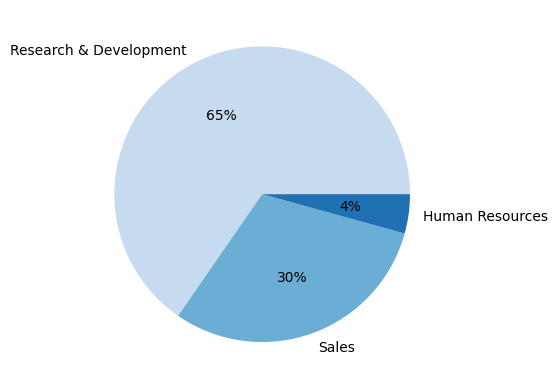

In [137]:
data2 = df1["Department"].value_counts()

colors1 = sns.color_palette('Blues', len(data2))
 
plt.pie(data2.values,
        labels=data2.index,
        autopct='%1.0f%%',
        colors=colors1)
p=plt.gcf();

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3652702886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["EducationField"], palette='Blues');


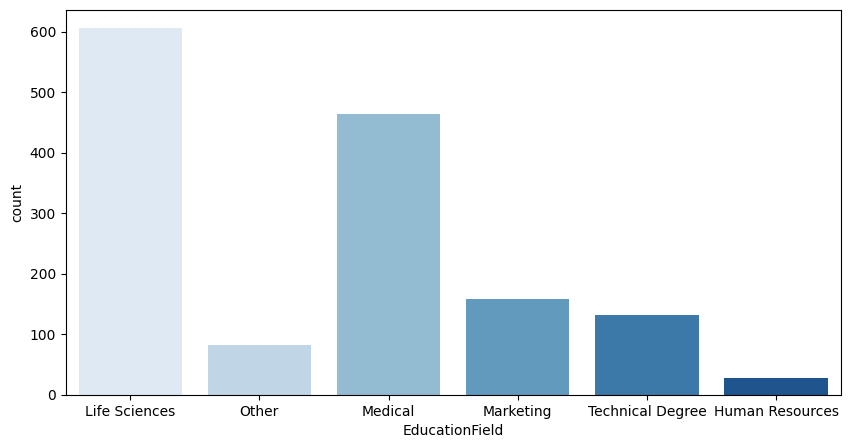

In [138]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["EducationField"], palette='Blues');

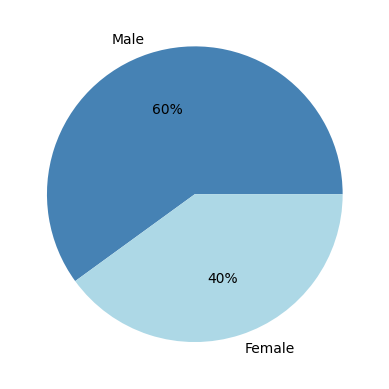

In [139]:
data5 = df1["Gender"].value_counts()
 
plt.pie(data5.values,
        labels=data5.index,
        autopct='%1.0f%%',
        colors=['steelblue', 'lightblue'])
p=plt.gcf();

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3457119275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["EducationField"], palette= 'Blues');


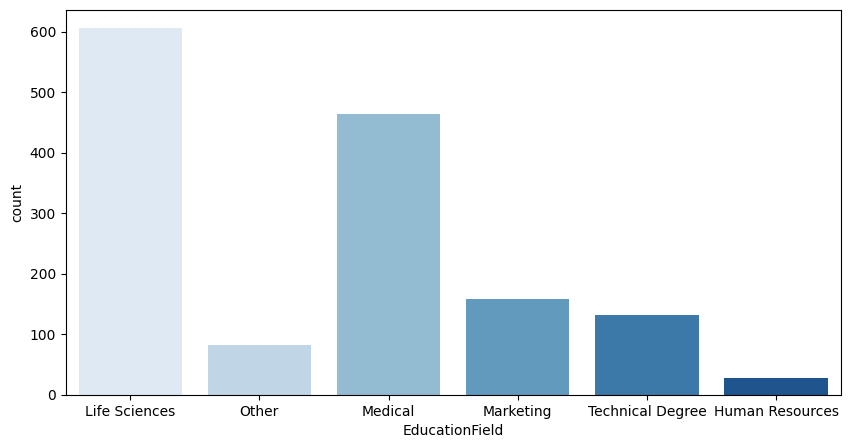

In [140]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["EducationField"], palette= 'Blues');

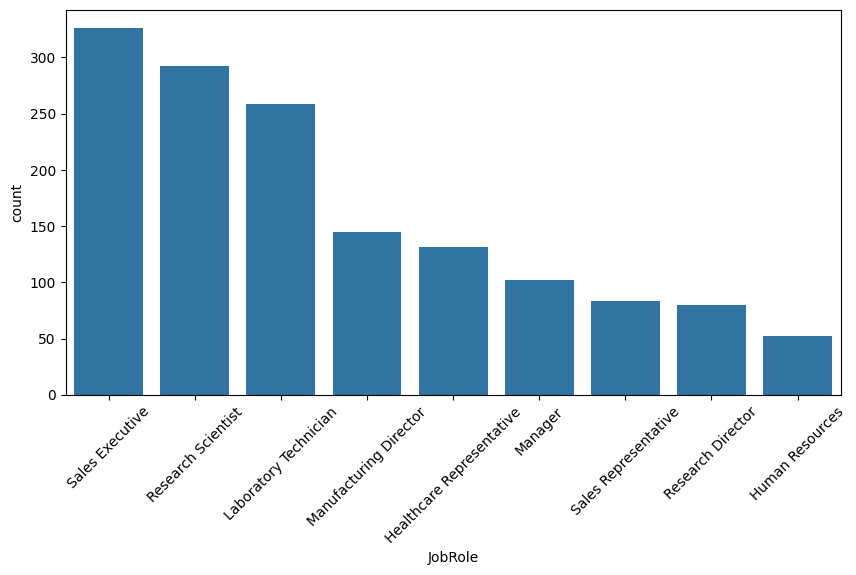

In [141]:
plt.figure(figsize=(10,5))
chart1= sns.countplot(x=df["JobRole"]);
plt.xticks(rotation = 45);

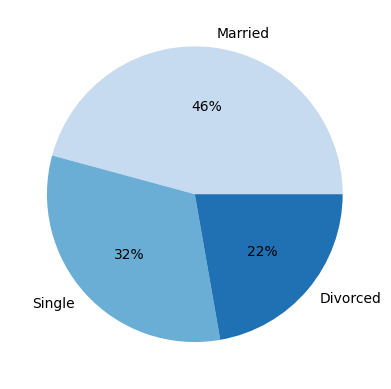

In [142]:
data1 = df1["MaritalStatus"].value_counts()

colors = sns.color_palette('Blues', len(data1))
 
plt.pie(data1.values,
        labels=data1.index,
        autopct='%1.0f%%',
        colors= colors)
p=plt.gcf();

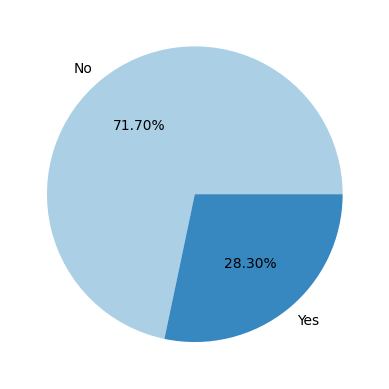

In [143]:
data = df1["OverTime"].value_counts()

colors = sns.color_palette('Blues', len(data))
 
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%',
        colors=colors)
p=plt.gcf();

#### VARIABLES CATEGÓRICAS ORDINALES

    - Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'
    - EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'
    - RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

In [144]:
df2= df1.copy()

In [145]:
df2['Education']= df2['Education'].replace([1, 2, 3, 4, 5], ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

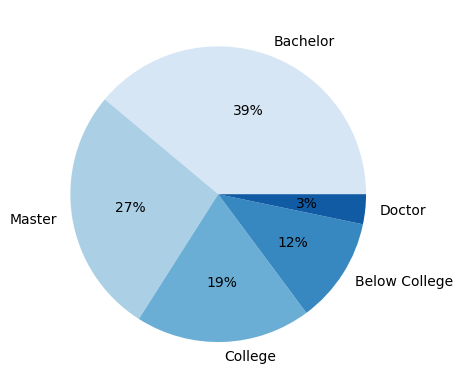

In [146]:
data6 = df2["Education"].value_counts()

colors = sns.color_palette('Blues', len(data6))
 
plt.pie(data6.values,
        labels=data6.index,
        autopct='%1.0f%%',
        colors= colors)
p=plt.gcf();

In [147]:
df2['EnvironmentSatisfaction']= df2['EnvironmentSatisfaction'].replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'])

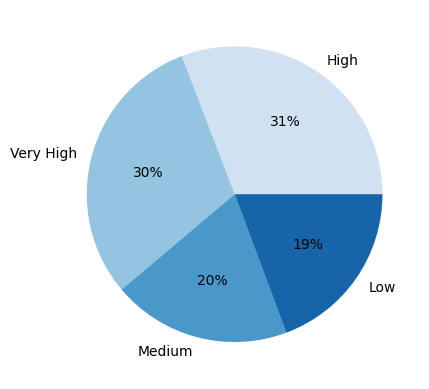

In [148]:
data7 = df2["EnvironmentSatisfaction"].value_counts()

colors = sns.color_palette('Blues', len(data7))
 
plt.pie(data7.values,
        labels=data7.index,
        autopct='%1.0f%%',
        colors= colors)
p=plt.gcf();

In [149]:
df2['JobInvolvement']= df2['JobInvolvement'].replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'])

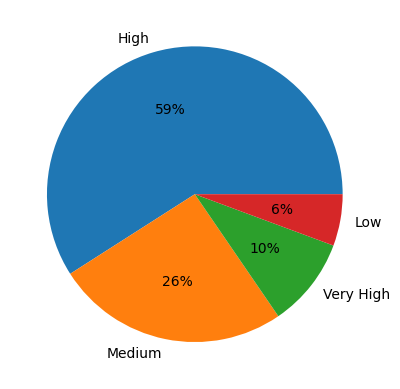

In [150]:
data8 = df2["JobInvolvement"].value_counts()
 
plt.pie(data8.values,
        labels=data8.index,
        autopct='%1.0f%%')
p=plt.gcf();

In [151]:
df2['JobSatisfaction']= df2['JobSatisfaction'].replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'])

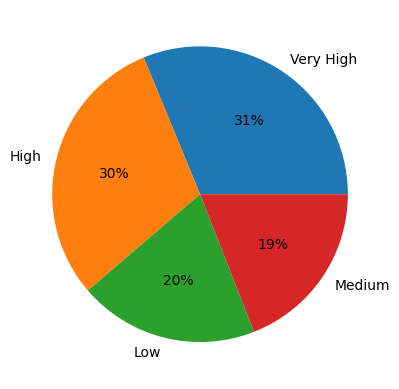

In [152]:
data9 = df2["JobSatisfaction"].value_counts()
 
plt.pie(data9.values,
        labels=data9.index,
        autopct='%1.0f%%')
p=plt.gcf();

In [153]:
df2['PerformanceRating']= df2['PerformanceRating'].replace([1, 2, 3, 4], ['Low', 'Good', 'Excellent', 'Outstanding'])

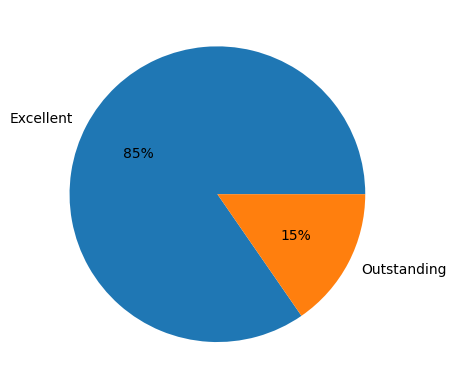

In [154]:
data10 = df2["PerformanceRating"].value_counts()
 
plt.pie(data10.values,
        labels=data10.index,
        autopct='%1.0f%%')
p=plt.gcf();

In [155]:
df2['RelationshipSatisfaction']= df2['RelationshipSatisfaction'].replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'])

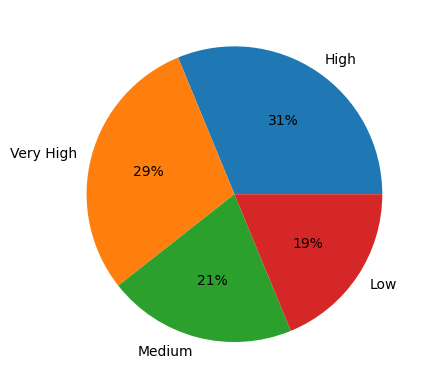

In [156]:
data11 = df2["RelationshipSatisfaction"].value_counts()
 
plt.pie(data11.values,
        labels=data11.index,
        autopct='%1.0f%%')
p=plt.gcf();

In [157]:
df2['WorkLifeBalance']= df2['WorkLifeBalance'].replace([1, 2, 3, 4], ['Bad', 'Good', 'Better', 'Best']) 

([<matplotlib.patches.Wedge at 0x25c6d4179e0>,
 [Text(-0.3644161489437636, 1.0378828789362493, 'Better'),
  Text(-0.17556005571460462, -1.0858999340811681, 'Good'),
  Text(0.8629381110783174, -0.6821567389160543, 'Best'),
  Text(1.083961989101254, -0.18715342952682704, 'Bad')],
 [Text(-0.1987724448784165, 0.5661179339652268, '61%'),
  Text(-0.09576003038978433, -0.5923090549533644, '23%'),
  Text(0.4706935151336276, -0.3720854939542114, '10%'),
  Text(0.5912519940552294, -0.10208368883281474, '5%')])

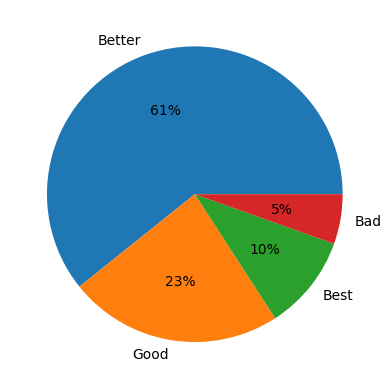

In [158]:
data12 = df2["WorkLifeBalance"].value_counts()
 
plt.pie(data12.values,
        labels=data12.index,
        autopct='%1.0f%%')

Text(0.5, 1.0, 'Data 12')

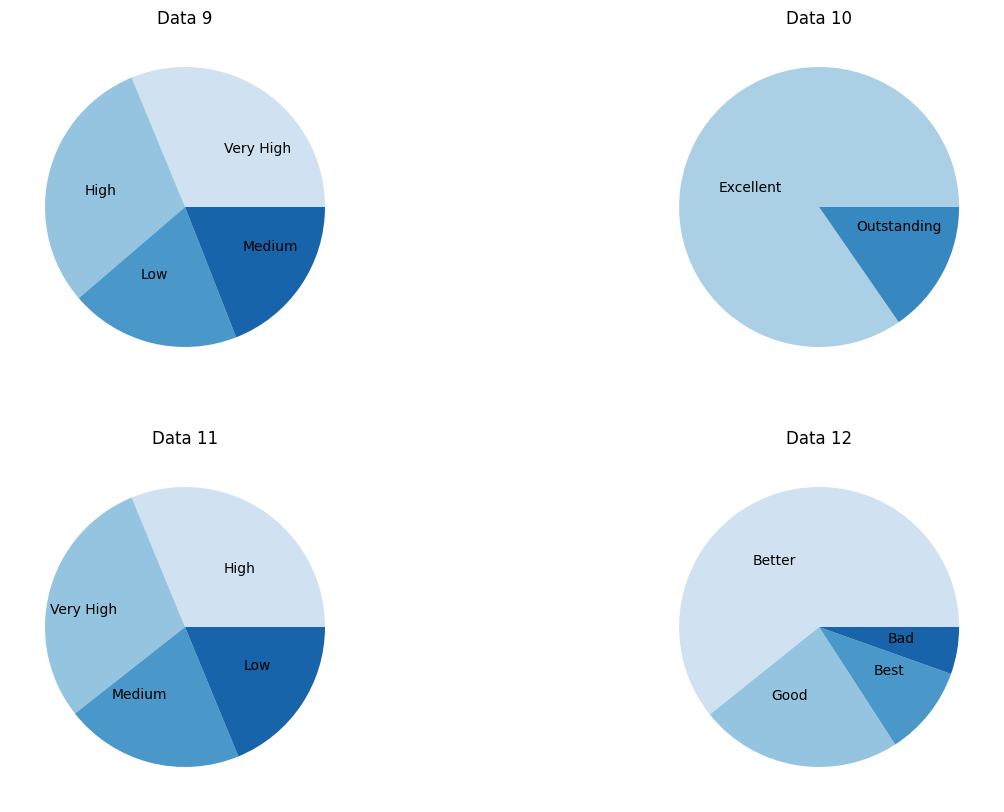

In [159]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)

colors0_0 = sns.color_palette('Blues', len(data9))
colors0_1 = sns.color_palette('Blues', len(data10))
colors1_0 = sns.color_palette('Blues', len(data11))
colors1_1 = sns.color_palette('Blues', len(data12))



axes[0, 0].pie(data9.values,
               labels=data9.index,
               colors=colors0_0,
               labeldistance=0.5,
               pctdistance=0.3)
axes[0, 0].set_title('Data 9')

axes[0, 1].pie(data10.values,
               labels=data10.index,
               colors= colors0_1,
               labeldistance=0.3)
axes[0, 1].set_title('Data 10')

axes[1, 0].pie(data11.values,
               labels=data11.index,
               colors= colors1_0,
               labeldistance=0.5)
axes[1, 0].set_title('Data 11')

axes[1, 1].pie(data12.values,
               labels=data12.index,
               colors= colors1_1,
               labeldistance=0.5)
axes[1, 1].set_title('Data 12')

#### VARIABLES NUMÉRICAS

In [160]:
df2.dtypes[df2.dtypes == "int64"]

Age                        int64
MonthlyIncome              int64
PercentSalaryHike          int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
dtype: object

In [161]:
df2.columns[df2.dtypes == "int64"]

Index(['Age', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

In [162]:
variables_exp=df2.copy()
hist= ['MonthlyIncome', 'PercentSalaryHike', 'TrainingTimesLastYear', 'NumCompaniesWorked']
variables_exp.drop(hist, axis= 1, inplace=True)

In [163]:
variables_exp.columns[variables_exp.dtypes == 'int64']

Index(['Age', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

<Axes: >

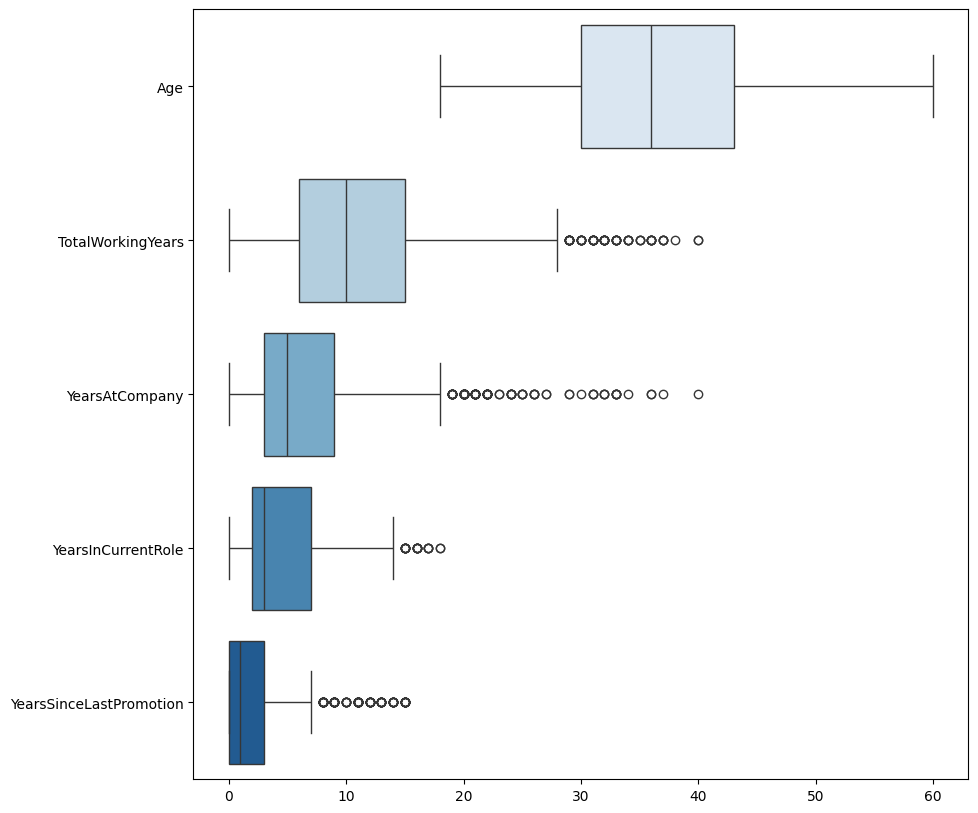

In [164]:
plt.figure(figsize=(10,10))
sns.boxplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[:]], orient='h', palette="Blues")

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2469342158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Age"],


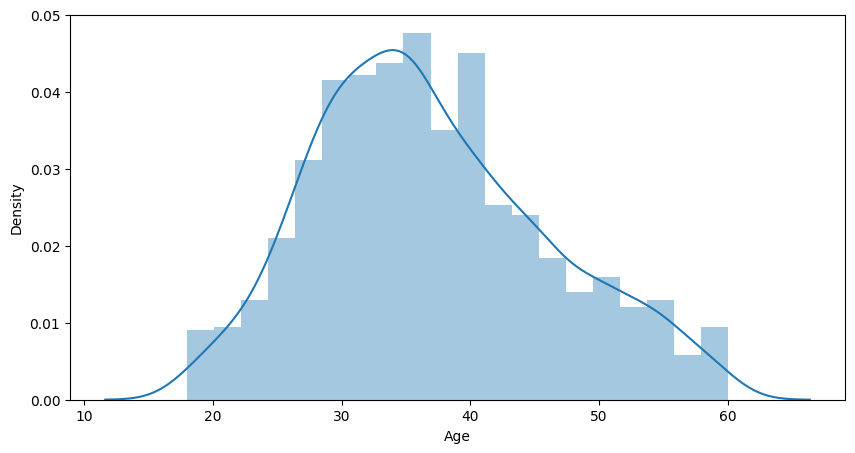

In [165]:
plt.figure(figsize=(10,5))
sns.distplot(df2["Age"],
             kde=True,
            bins=20);

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3950636318.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[1:3]], palette= 'Blues', shade=True, ax=axes[0])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3950636318.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[3:]], palette= 'Blues', shade=True, ax=axes[1])


<Axes: ylabel='Density'>

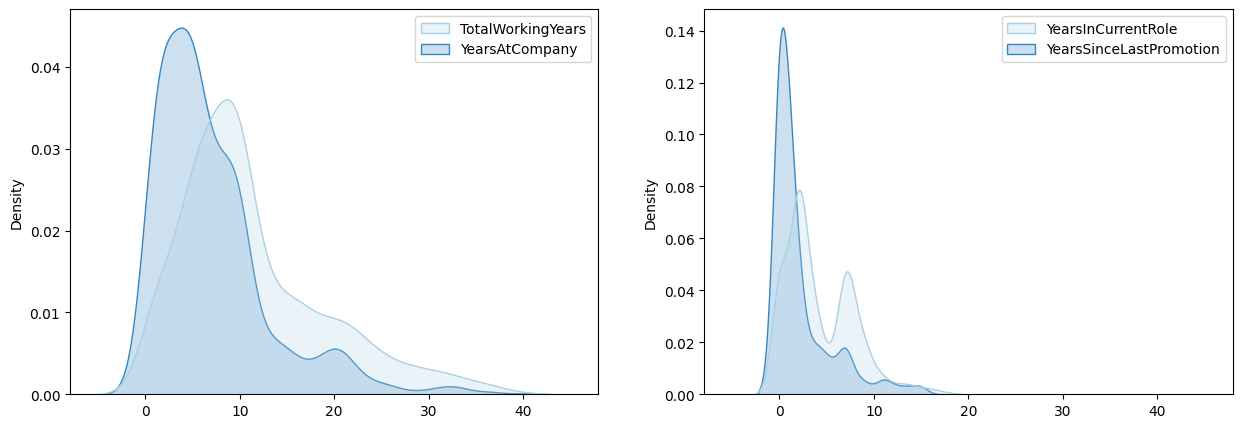

In [166]:
f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)
sns.kdeplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[1:3]], palette= 'Blues', shade=True, ax=axes[0])
sns.kdeplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[3:]], palette= 'Blues', shade=True, ax=axes[1])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3489143406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["MonthlyIncome"],


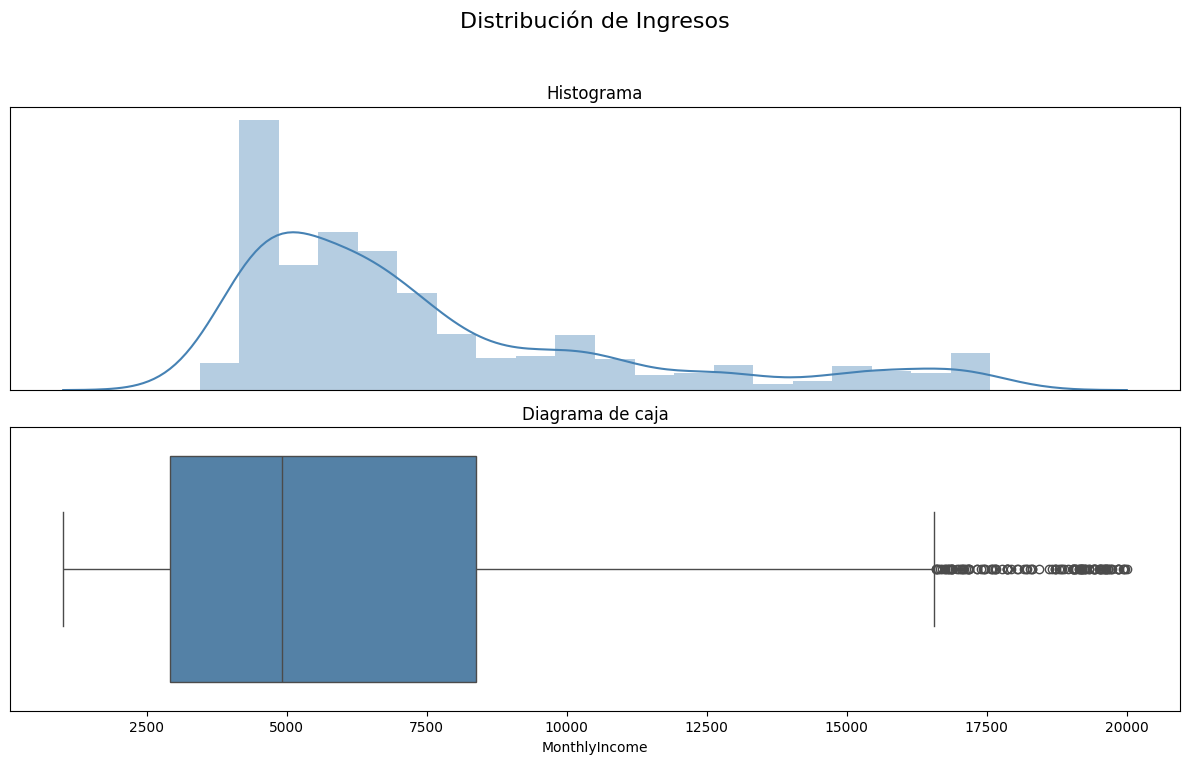

In [167]:
f, axes = plt.subplots(2, 1, figsize=(12,8))
f.suptitle('Distribución de Ingresos', fontsize=16)

sns.distplot(df2["MonthlyIncome"],
             kde=True,
            bins=20,
            color='steelblue',
            ax=axes[0]);
axes[0].set_title('Histograma')
axes[0].yaxis.set_visible(False)
axes[0].xaxis.set_visible(False)

sns.boxplot(df2["MonthlyIncome"],
            color='steelblue',
            ax=axes[1],
            orient='h');

axes[1].set_title('Diagrama de caja')
axes[1].yaxis.set_visible(False)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### ANALÍSIS BIVARIANTE

#### Variables Categóricas (Nominales)

BusinessTravel              object
Department                  object
EducationField              object
Gender                      object
JobRole                     object
MaritalStatus               object
OverTime                    object

In [168]:
df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3610032312.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3610032312.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Department,,
Human Resources,6654.507937,3886.0
Research & Development,6281.252862,4374.0
Sales,6959.172646,5754.5


C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2070043355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="Department", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='Department', ylabel='MonthlyIncome'>

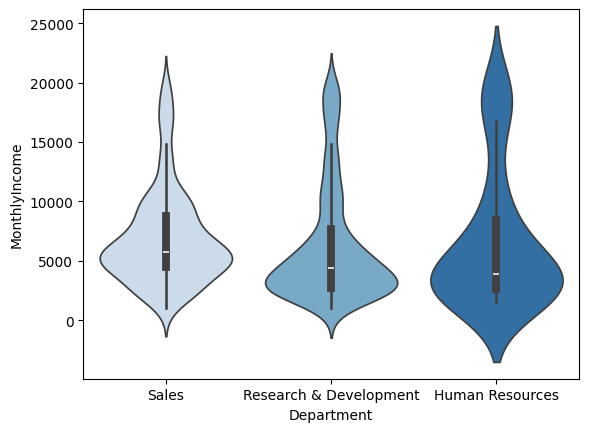

In [169]:
sns.violinplot(data=df1, x="Department", y="MonthlyIncome", palette= 'Blues')

In [170]:
df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1116162445.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1116162445.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Gender,,
Female,6686.566327,5081.5
Male,6380.507937,4837.5


In [171]:
df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4177486508.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4177486508.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
MaritalStatus,,
Divorced,6786.287462,5131.0
Married,6793.671620,5204.0
Single,5889.472340,4536.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1932262329.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="MaritalStatus", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='MaritalStatus', ylabel='MonthlyIncome'>

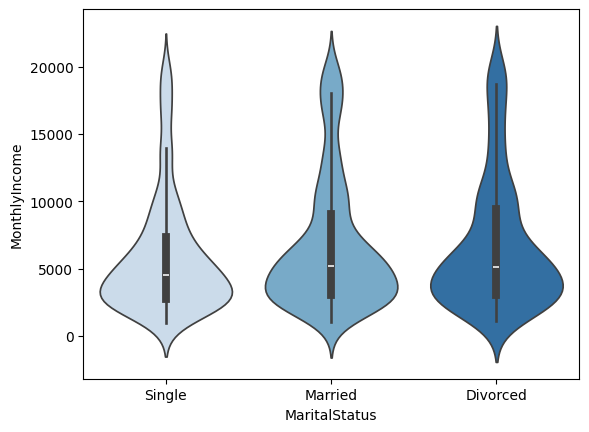

In [172]:
sns.violinplot(data=df1, x="MaritalStatus", y="MonthlyIncome", palette= 'Blues')

In [226]:
df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1323791143.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1323791143.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])


,mean,median
MaritalStatus,,
Divorced,37.489297,37.0
Married,37.757801,36.0
Single,35.336170,34.0


In [174]:
df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1251108155.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1251108155.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobRole,,
Healthcare Representative,7528.763359,6811.0
Human Resources,4235.750000,3093.0
Laboratory Technician,3237.169884,2886.0
Manager,17181.676471,17454.5
Manufacturing Director,7295.137931,6447.0
Research Director,16033.550000,16510.0
Research Scientist,3239.972603,2887.5
Sales Executive,6924.279141,6231.0
Sales Representative,2626.000000,2579.0


#### Variables Categóricas (Ordinales)

In [175]:
df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4016758584.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4016758584.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Education,,
1,5640.570588,3849.0
2,6226.645390,4891.5
3,6517.263986,4762.0
4,6832.402010,5341.5
5,8277.645833,6203.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3102468984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="Education", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='Education', ylabel='MonthlyIncome'>

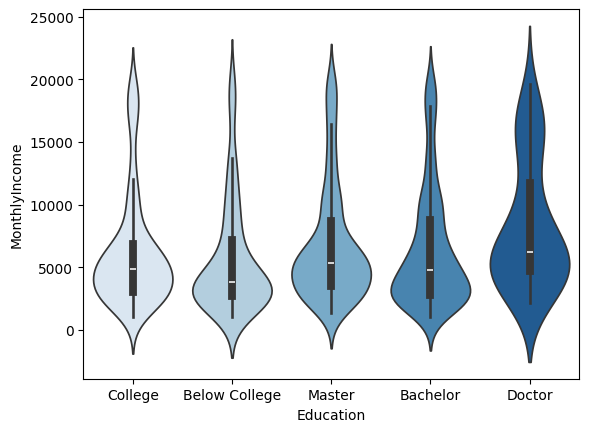

In [176]:
sns.violinplot(data=df2, x="Education", y="MonthlyIncome", palette= 'Blues')

Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'

In [177]:
df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3845046053.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3845046053.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
EnvironmentSatisfaction,,
1,6717.080986,5020.5
2,6283.728223,4963.0
3,6482.366446,4855.0
4,6528.511211,4872.5


EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [178]:
df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\806631547.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\806631547.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobInvolvement,,
1,6418.108434,5346.0
2,6609.648000,5163.0
3,6521.637097,4815.5
4,6161.159722,4888.0


JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [179]:
df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\244261045.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\244261045.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobSatisfaction,,
1,6561.570934,4968.0
2,6527.328571,4853.0
3,6480.495475,4788.5
4,6472.732026,5126.0


JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [180]:
df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1954906032.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1954906032.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
PerformanceRating,,
3,6537.274116,4965.5
4,6313.893805,4777.0


PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'

In [181]:
df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2853107831.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2853107831.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
RelationshipSatisfaction,,
1,6177.793478,4745.0
2,6596.983498,4950.0
3,6543.773420,4907.0
4,6601.296296,5027.0


RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [182]:
df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\49404431.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\49404431.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
WorkLifeBalance,,
1,5887.137500,4269.5
2,6461.808140,4970.0
3,6532.232923,4941.0
4,6746.352941,5067.0


WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2346694160.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_data2 = df1.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2346694160.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  agg_data2 = df1.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()


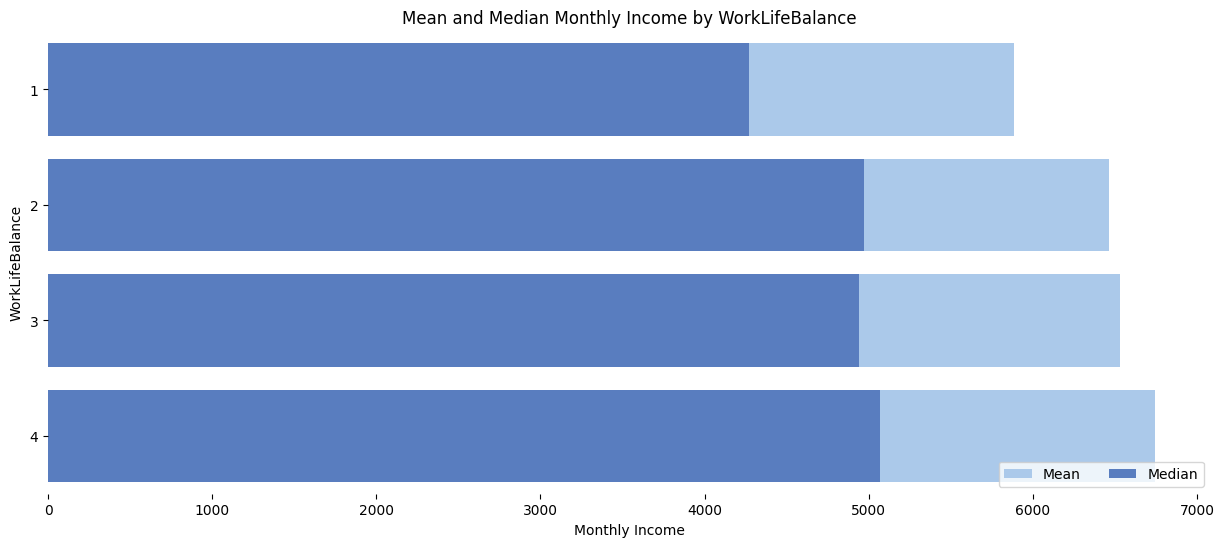

In [183]:
agg_data2 = df1.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()

# Crear la figura y los ejes
f, ax = plt.subplots(figsize=(15, 6))

# Crear el barplot para la media
sns.set_color_codes("pastel")
sns.barplot(x="mean", y="WorkLifeBalance", data=agg_data2,
            label="Mean", color="b", orient='h')

# Crear el barplot para la mediana
sns.set_color_codes("muted")
sns.barplot(x="median", y="WorkLifeBalance", data=agg_data2,
            label="Median", color="b", orient='h')

# Añadir la leyenda y las etiquetas informativas del eje
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Monthly Income", ylabel="WorkLifeBalance",
       title="Mean and Median Monthly Income by WorkLifeBalance")
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()

In [184]:
df1.groupby('TrainingTimesLastYear')['MonthlyIncome'].agg(np.mean)

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1519635214.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby('TrainingTimesLastYear')['MonthlyIncome'].agg(np.mean)


TrainingTimesLastYear
0    6213.907407
1    6746.507042
2    6643.177331
3    6480.608961
4    6214.991870
5    6484.806723
6    6043.430769
Name: MonthlyIncome, dtype: float64

In [185]:
df.groupby('OverTime')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1191126214.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('OverTime')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1191126214.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('OverTime')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
OverTime,,
No,6484.926945,4880.0
Yes,6548.548077,5061.5


In [186]:
df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2391403868.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2391403868.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
NumCompaniesWorked,,
0,5805.238579,4523.0
1,5259.963532,4037.0
2,7688.678082,6384.0
3,8270.547170,6261.0
>3,7243.114094,5410.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1390592372.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_num = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1390592372.py:2: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_num = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([ np.median])


Text(0.5, 1.0, 'Median Monthly Income')

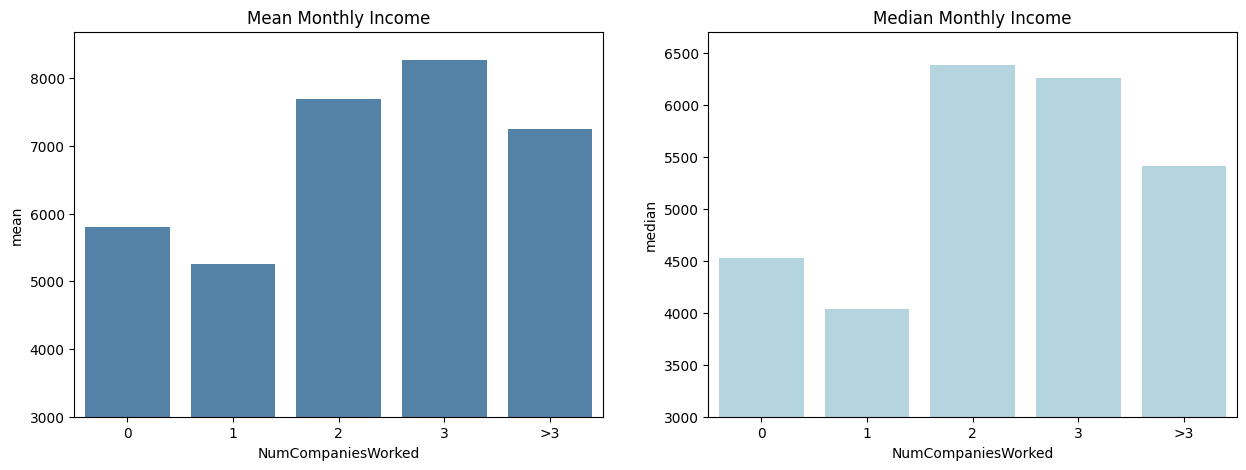

In [187]:
mean_num = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean])
median_num = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([ np.median])

f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

sns.barplot(x='NumCompaniesWorked', y='mean', data=mean_num, color='steelblue', ax=axes[0])
sns.barplot(x='NumCompaniesWorked', y='median', data=median_num, color='lightblue', ax=axes[1])

axes[0].set_ylim(3000, None)  
axes[0].set_title('Mean Monthly Income')

axes[1].set_ylim(3000, None)  
axes[1].set_title('Median Monthly Income')


C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3697881079.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_data3 = df2.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean])


Text(0.5, 1.0, 'Mean Monthly Income by WorkLifeBalance')

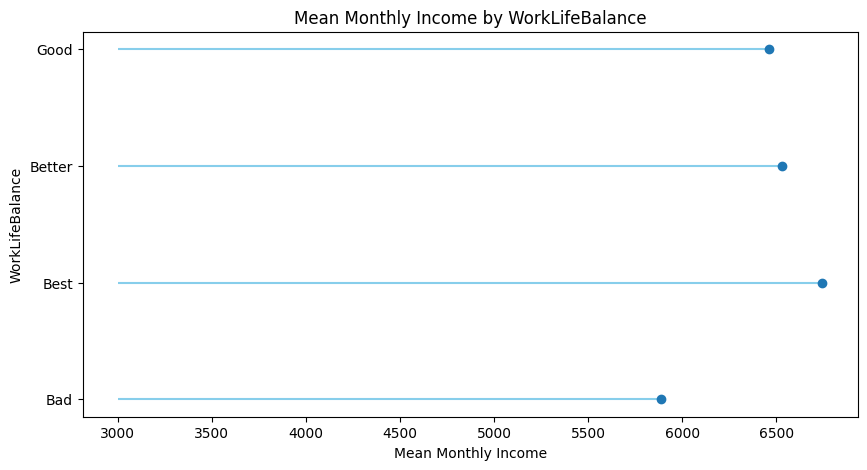

In [188]:
agg_data3 = df2.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean])

# Crear la figura y los ejes
plt.figure(figsize=(10, 5))

# Crear un gráfico de líneas horizontales
plt.hlines(y=agg_data3.index, xmin=3000, xmax=agg_data3['mean'], color='skyblue')
plt.plot(agg_data3['mean'], agg_data3.index, "o")

# Añadir etiquetas y título
plt.xlabel('Mean Monthly Income')
plt.ylabel('WorkLifeBalance')
plt.title('Mean Monthly Income by WorkLifeBalance')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\663561895.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_data = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\663561895.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  agg_data = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()


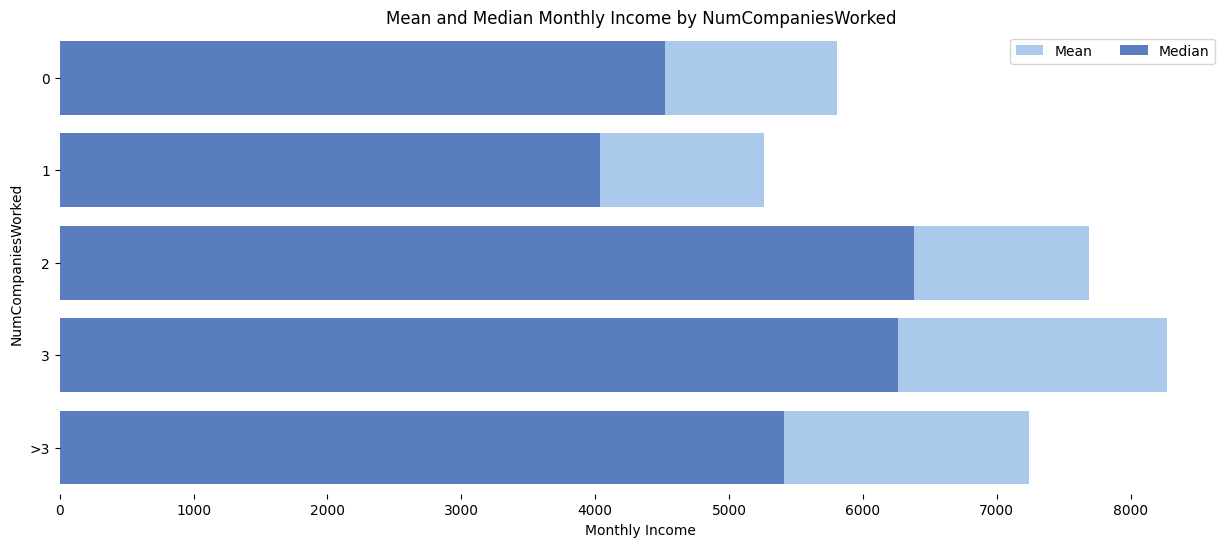

In [189]:
agg_data = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()

# Crear la figura y los ejes
f, ax = plt.subplots(figsize=(15, 6))

# Crear el barplot para la media
sns.set_color_codes("pastel")
sns.barplot(x="mean", y="NumCompaniesWorked", data=agg_data,
            label="Mean", color="b", orient='h')

# Crear el barplot para la mediana
sns.set_color_codes("muted")
sns.barplot(x="median", y="NumCompaniesWorked", data=agg_data,
            label="Median", color="b", orient='h')

# Añadir la leyenda y las etiquetas informativas del eje
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Monthly Income", ylabel="NumCompaniesWorked",
       title="Mean and Median Monthly Income by NumCompaniesWorked")
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2207441571.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="NumCompaniesWorked", y="MonthlyIncome", palette="Blues_d")


<Axes: xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

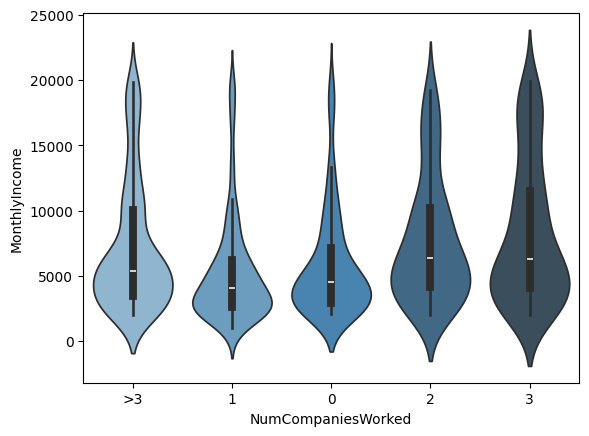

In [190]:
sns.violinplot(data=df2, x="NumCompaniesWorked", y="MonthlyIncome", palette="Blues_d")

#### Variables Numéricas

Dentro de las variables numéricas, me ecentraré en este caso en la correlación entre las variables contínuas

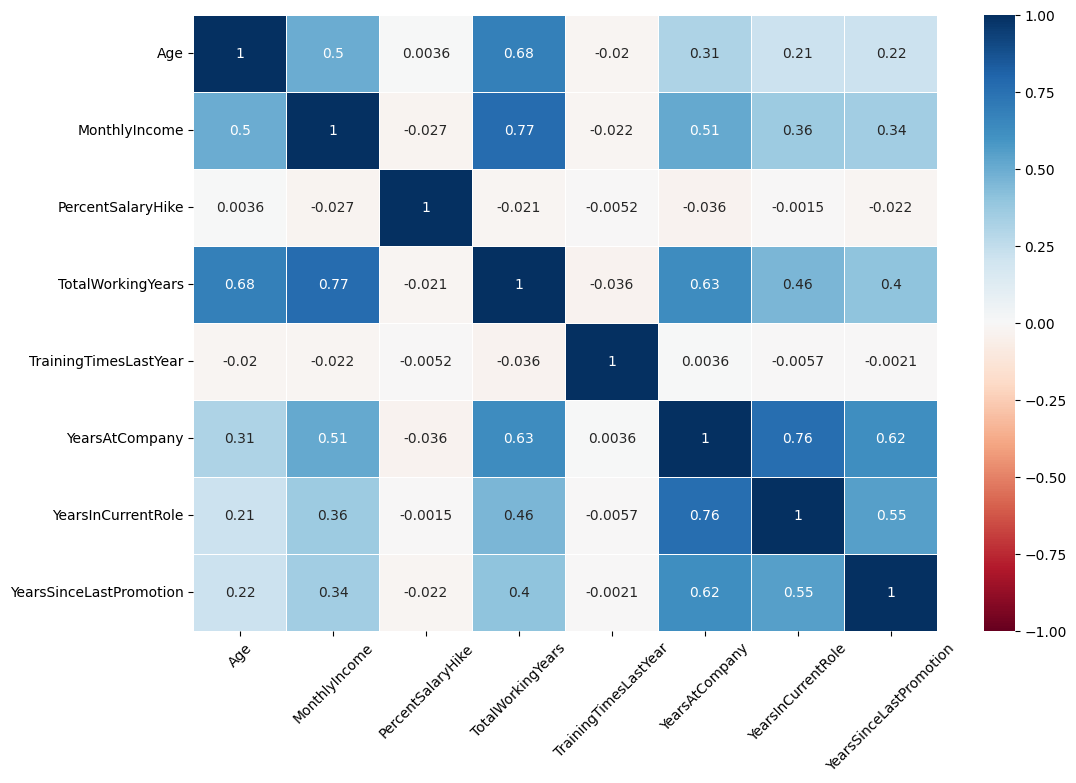

In [191]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(numeric_only=True),vmin=-1, vmax=1, center=0,
            cmap='RdBu',
            linewidths=.5, annot=True);
plt.xticks(rotation = 45);

- Hay una correlación postiva fuerte (R >0.7) entre la experiencia laboral y el salario mensual
- Hay una correlación postiva débil (0.5< R <0.7) entre los años de trabajo dentro de la compañía y el salario mensual
- Hay una correlación postiva débil (0.5< R <0.7) entre la edad y el salario mensual. Esta relación se puede deber a la correlación entre edad y la experiencia laboral

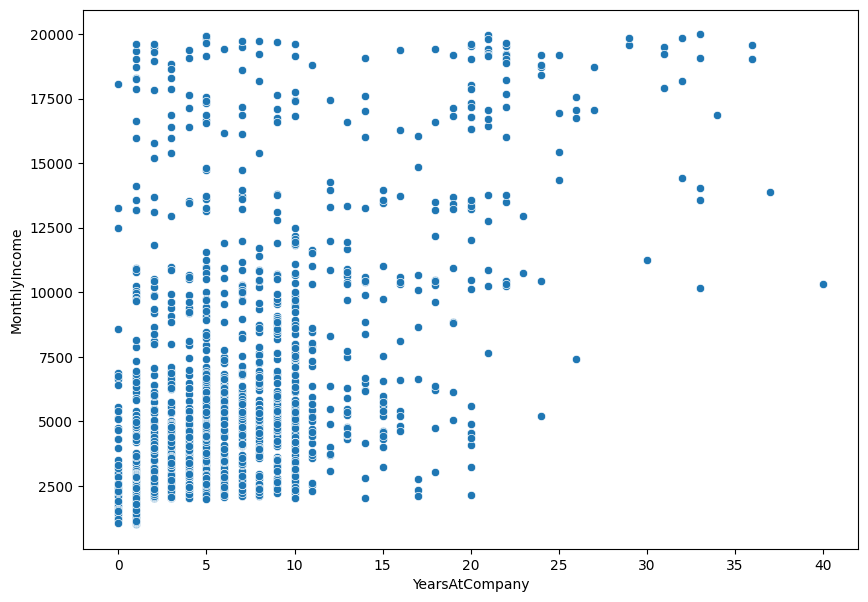

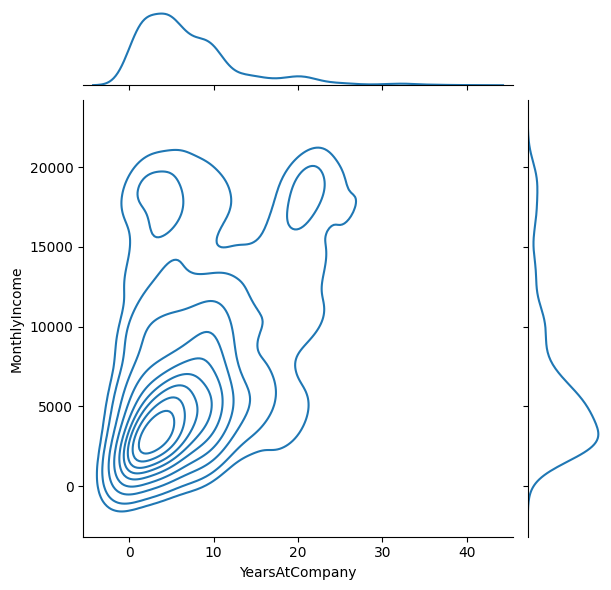

In [192]:
f, axes = plt.subplots(figsize = (10,7), sharex=True)
sns.scatterplot(data=df1, x='YearsAtCompany', y="MonthlyIncome")
sns.jointplot(x=df1['YearsAtCompany'], y=df1['MonthlyIncome'], kind="kde")

### ANÁLISIS MULTIVARIANTE

In [193]:
df1.columns

Index(['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4066766151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="JobRole", y="MonthlyIncome", palette= 'Blues')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

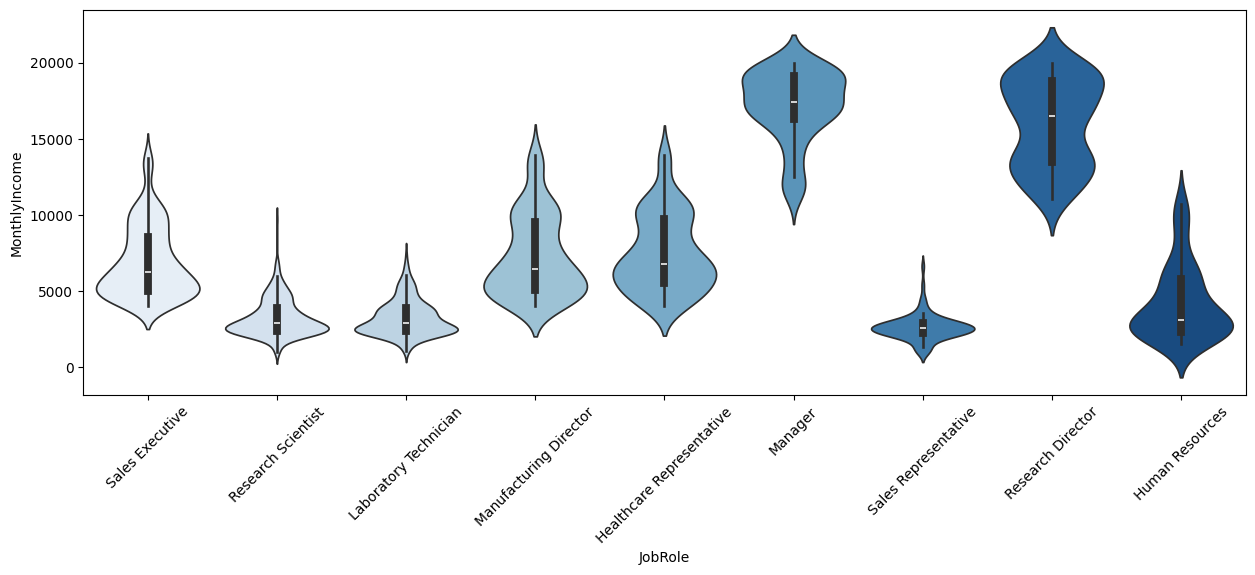

In [194]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df1, x="JobRole", y="MonthlyIncome", palette= 'Blues')
plt.xticks(rotation = 45)

In [195]:
df2['JobRole']= df1['JobRole'].replace(["Laboratory Technician", "Research Scientist", "Human Resources", "Sales Representative"], ["Regular Employee", "Regular Employee", "Regular Employee", "Regular Employee"])

In [196]:
df2['JobRole']= df2['JobRole'].replace(["Research Director", "Manager"], ["Senior Manager", "Senior Manager"]) 

In [197]:
df2['JobRole']= df2['JobRole'].replace(["Healthcare Representative", "Manufacturing Director", "Sales Executive"], ["Middle Management", "Middle Management", "Middle Management"])

In [198]:
df1['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\152954528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="JobRole", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='JobRole', ylabel='MonthlyIncome'>

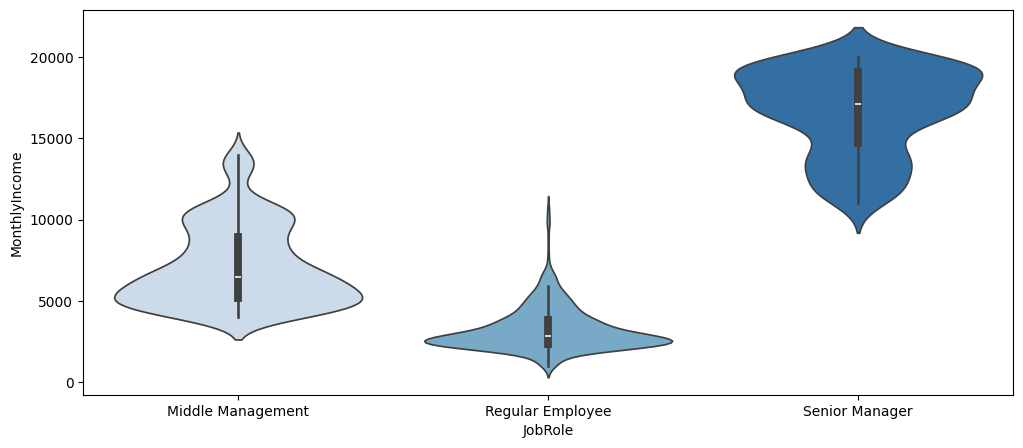

In [199]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df2, x="JobRole", y="MonthlyIncome", palette= 'Blues')

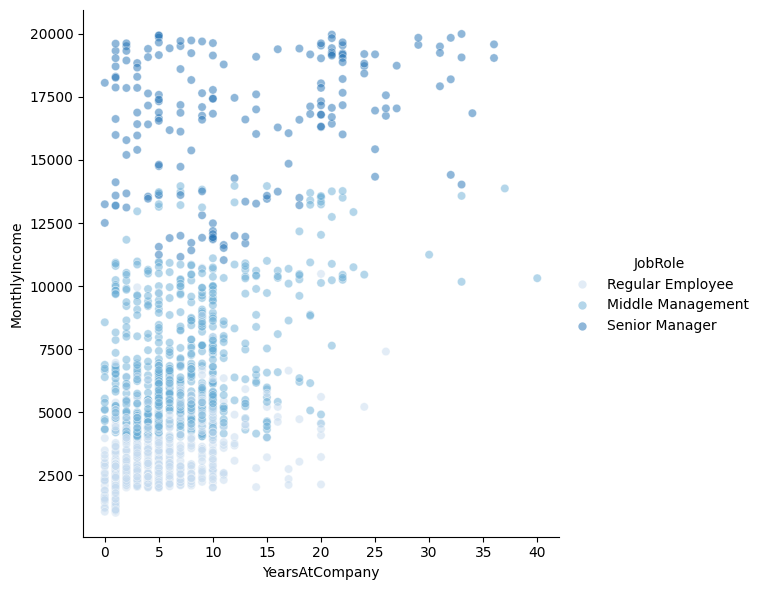

In [200]:
df2['JobRole'] = pd.Categorical(df2['JobRole'], categories=['Regular Employee', 'Middle Management', 'Senior Manager'], ordered=True)


sns.relplot(data=df2,
            x="YearsAtCompany",
            y="MonthlyIncome",
            hue="JobRole",
            sizes=(4, 300),
            alpha=.5, palette="Blues",
            height=6);

### CONCLUSIONES

#### HIPÓTESIS 1

- **Hipótesis 1**: "El nivel de educación, los años de experiencia y el nivel de compromiso influyen positivamente en el salario mensual (existe una relación positiva)"
- **Hipótesis 2**: "El área de especialización tiene un impacto en el salario- El departamento en el que el empleado trabaja dentro de la empresa y su área de estudios influye en su salario mensual"
- **Hipótesis 3**:"La vida personal puede tener un impacto en el salario- El grado de satisfacción dentro de una relación sentimental, el estado matrimonial y la precepción del equilibrio entre la vida personal y laboral pueden tener influye en el salario mensual"
- **Hipótesis 4**:"Factores exógenos- Factores incontrolables como el genero y la edad pueden tener un impacto en el salario"

Nivel de educación: Sí tiene efecto

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3102468984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="Education", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='Education', ylabel='MonthlyIncome'>

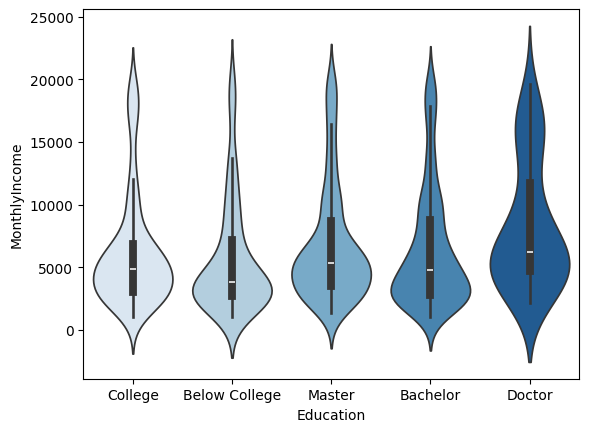

In [201]:
sns.violinplot(data=df2, x="Education", y="MonthlyIncome", palette= 'Blues')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\140765845.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_data5 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\140765845.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  agg_data5 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()


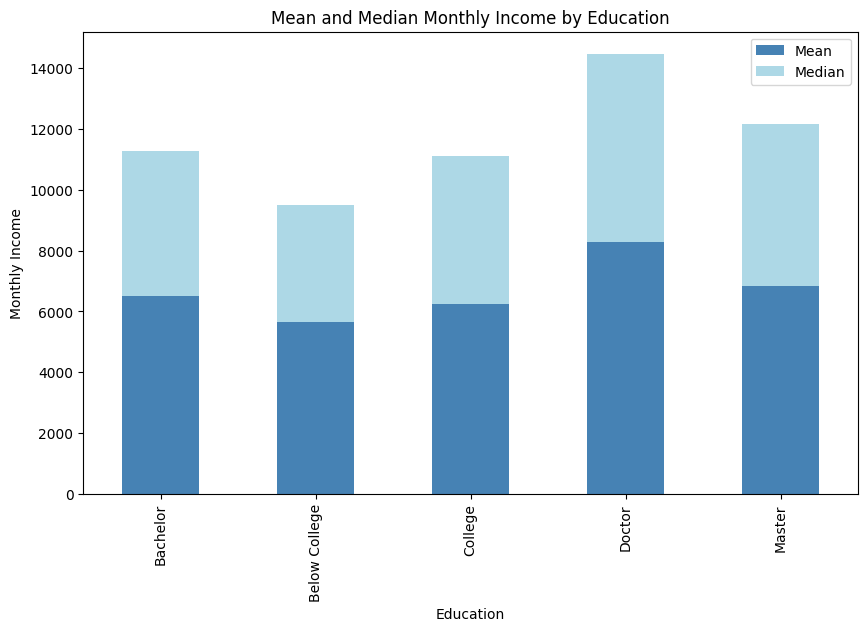

In [202]:
agg_data5 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras apiladas
agg_data5.set_index('Education').plot(kind='bar', stacked=True, color=['steelblue', 'lightblue'], ax=plt.gca())

# Añadir la leyenda y las etiquetas informativas del eje
plt.legend(['Mean', 'Median'])
plt.xlabel('Education')
plt.ylabel('Monthly Income')
plt.title('Mean and Median Monthly Income by Education')
plt.show()

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\863303684.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_data7 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index().sort_values(by="mean")
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\863303684.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  agg_data7 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index().sort_values(by="mean")


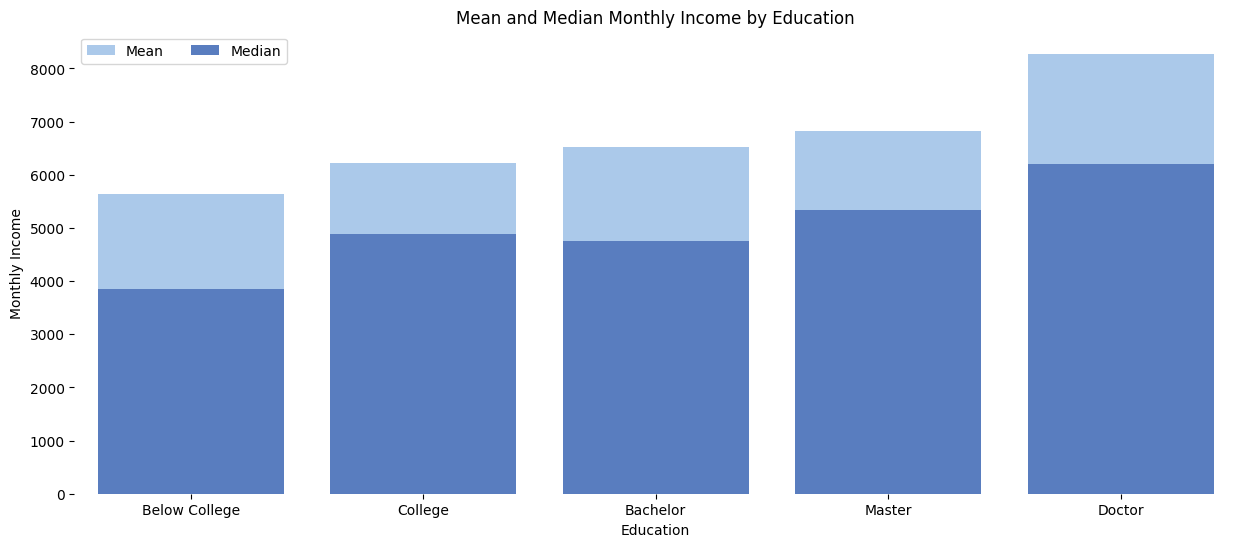

In [203]:
agg_data7 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index().sort_values(by="mean")

# Crear la figura y los ejes
f, ax = plt.subplots(figsize=(15, 6))

# Crear el barplot para la media
sns.set_color_codes("pastel")
sns.barplot(x="Education", y="mean", data=agg_data7, 
            label="Mean", color="b", orient='v')

# Crear el barplot para la mediana
sns.set_color_codes("muted")
sns.barplot(x="Education", y="median", data=agg_data7, 
            label="Median", color="b", orient='v')

# Añadir la leyenda y las etiquetas informativas del eje
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel="Education", ylabel="Monthly Income", 
       title="Mean and Median Monthly Income by Education")
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()

Años de experiencia:

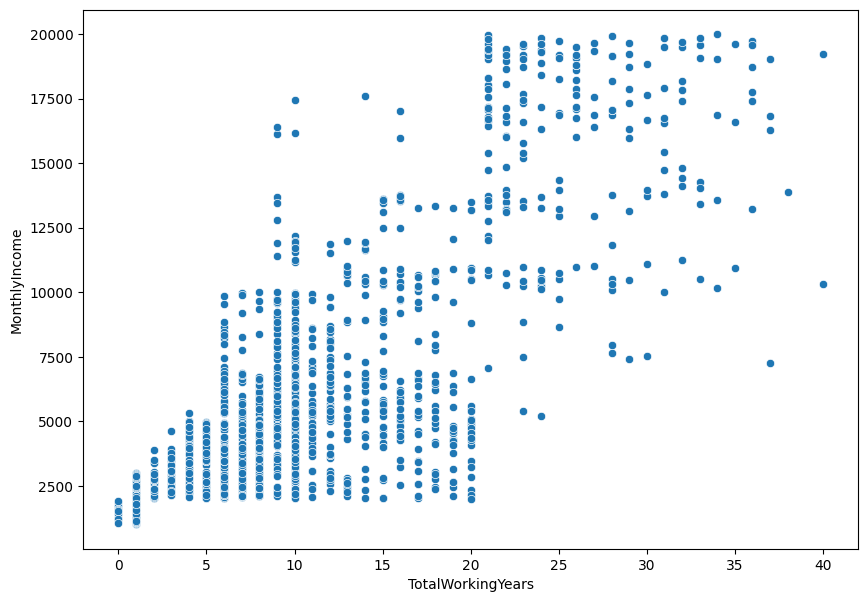

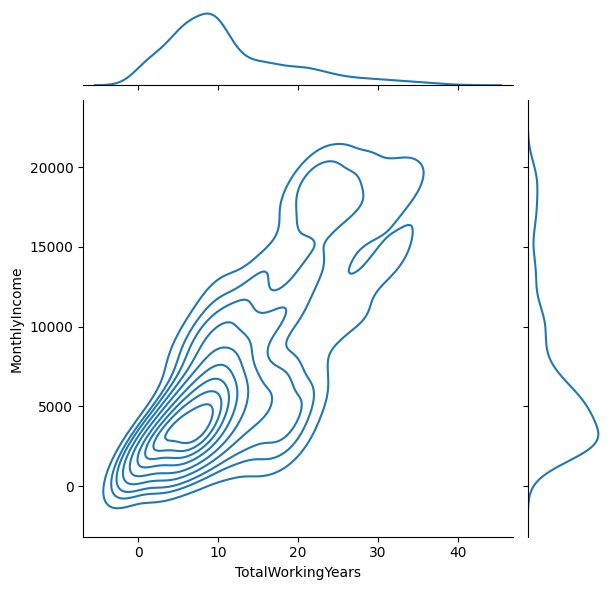

In [204]:
f, axes = plt.subplots(figsize = (10,7), sharex=True)
sns.scatterplot(data=df1, x='TotalWorkingYears', y="MonthlyIncome")
sns.jointplot(x=df1['TotalWorkingYears'], y=df1['MonthlyIncome'], kind="kde")

In [205]:
df2.columns

Index(['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

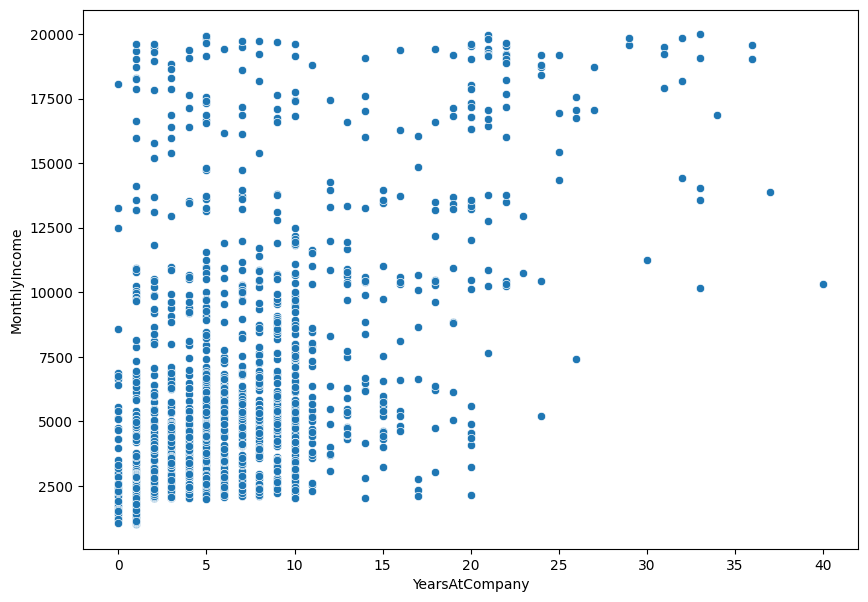

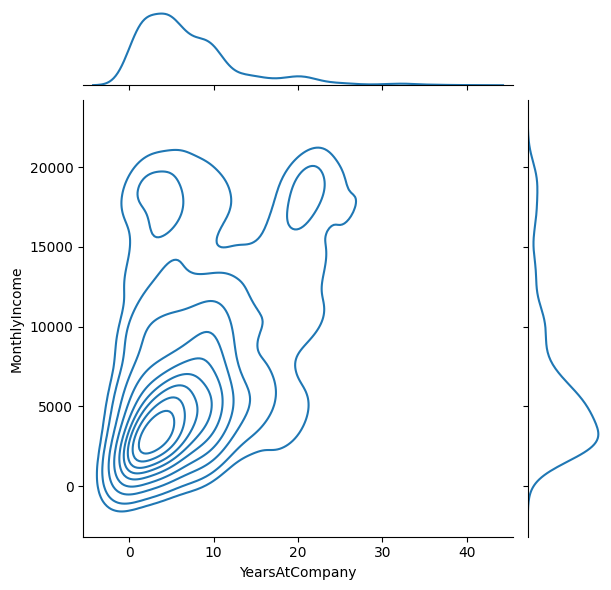

In [206]:
f, axes = plt.subplots(figsize = (10,7), sharex=True)
sns.scatterplot(data=df1, x='YearsAtCompany', y="MonthlyIncome")
sns.jointplot(x=df1['YearsAtCompany'], y=df1['MonthlyIncome'], kind="kde")

Hipótesís 1.C. No se ve ninguna relación entre el grado de compromiso y desempeño y el salario mensual 

In [207]:
df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])
df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4000528156.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4000528156.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4000528156.py:2: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, 

,mean,median
JobInvolvement,,
1,6418.108434,5346.0
2,6609.648000,5163.0
3,6521.637097,4815.5
4,6161.159722,4888.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1875304216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="JobInvolvement", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='JobInvolvement', ylabel='MonthlyIncome'>

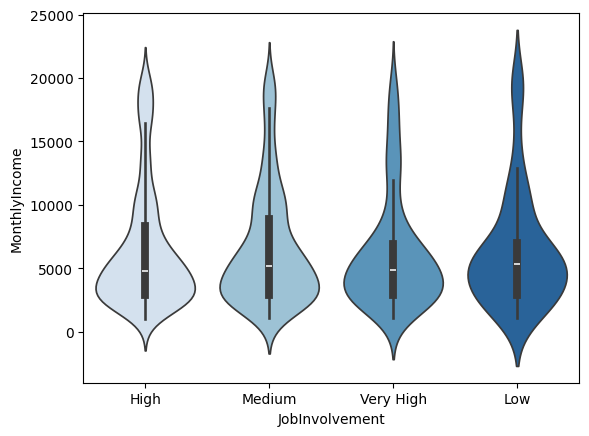

In [208]:

sns.violinplot(data=df2, x="JobInvolvement", y="MonthlyIncome", palette= 'Blues')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\124288503.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numJI = df2.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\124288503.py:2: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numJI = df2.groupby('JobInvolvement')['MonthlyIncome'].agg([ np.median])


Text(0.5, 1.0, 'Median Monthly Income')

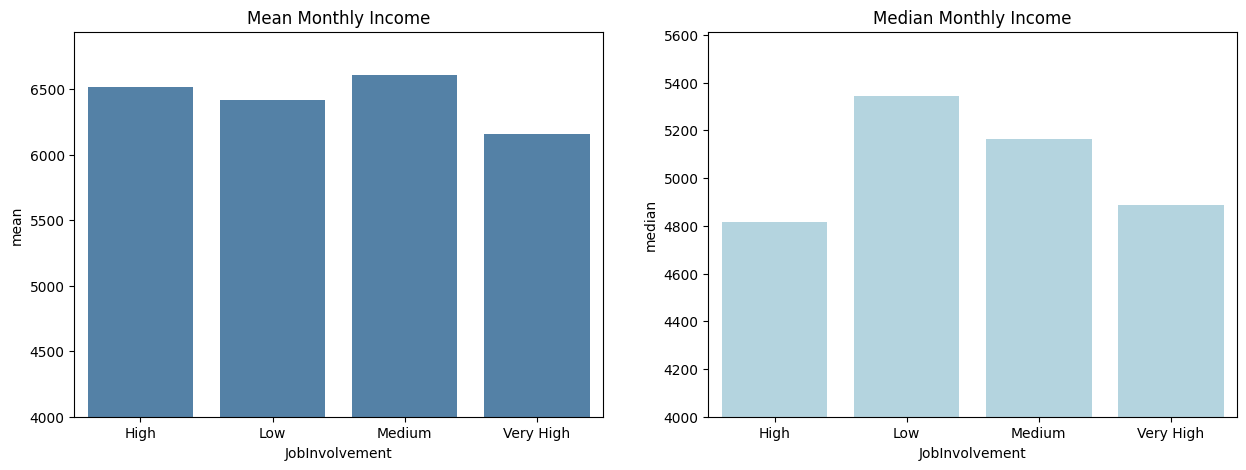

In [209]:
mean_numJI = df2.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean])
median_numJI = df2.groupby('JobInvolvement')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

df2['JobInvolvement'] = pd.Categorical(df2['JobInvolvement'], categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)

sns.barplot(x='JobInvolvement', y='mean', data=mean_numJI, color='steelblue', ax=axes[0])
sns.barplot(x='JobInvolvement', y='median', data=median_numJI, color='lightblue', ax=axes[1])

axes[0].set_ylim(4000, None)  
axes[0].set_title('Mean Monthly Income')

axes[1].set_ylim(4000, None)  
axes[1].set_title('Median Monthly Income')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4061991804.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numPR = df2.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\4061991804.py:2: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numPR = df2.groupby('PerformanceRating')['MonthlyIncome'].agg([ np.median])


Text(0.5, 1.0, 'Median Monthly Income')

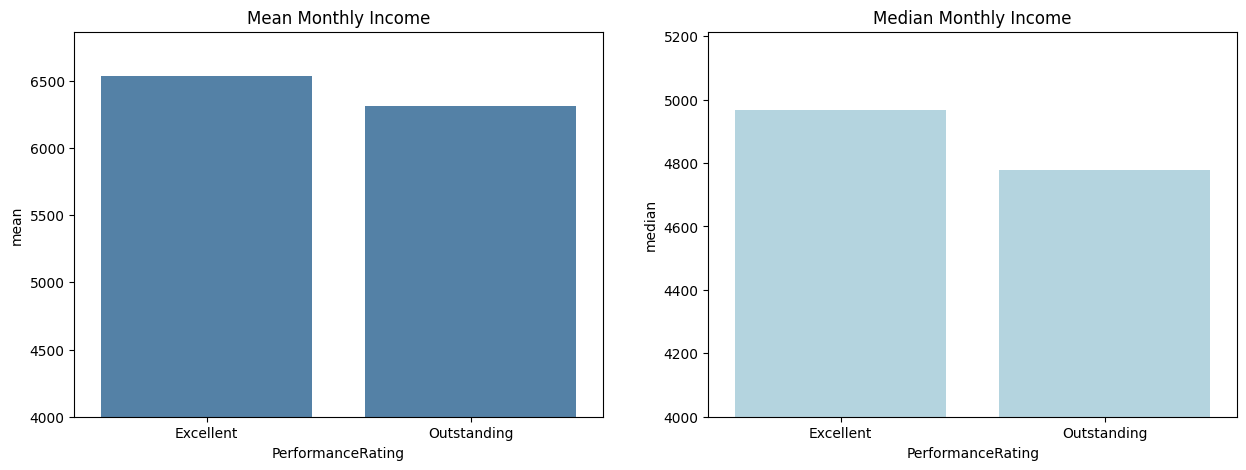

In [210]:
mean_numPR = df2.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean])
median_numPR = df2.groupby('PerformanceRating')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

df2['PerformanceRating'] = pd.Categorical(df2['PerformanceRating'], categories=['Excellent', 'Outstanding'], ordered=True)

sns.barplot(x='PerformanceRating', y='mean', data=mean_numPR, color='steelblue', ax=axes[0])
sns.barplot(x='PerformanceRating', y='median', data=median_numPR, color='lightblue', ax=axes[1])

axes[0].set_ylim(4000, None)  
axes[0].set_title('Mean Monthly Income')

axes[1].set_ylim(4000, None)  
axes[1].set_title('Median Monthly Income')

In [211]:
df1.columns

Index(['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [212]:
df2['PerformanceRating']

0         Excellent
1       Outstanding
2         Excellent
3         Excellent
4         Excellent
           ...     
1465      Excellent
1466      Excellent
1467    Outstanding
1468      Excellent
1469      Excellent
Name: PerformanceRating, Length: 1470, dtype: category
Categories (2, object): ['Excellent' < 'Outstanding']

- **Hipótesis 2**: "El área de especialización tiene un impacto en el salario- El departamento en el que el empleado trabaja dentro de la empresa y su área de estudios influye en su salario mensual"

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2070043355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="Department", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='Department', ylabel='MonthlyIncome'>

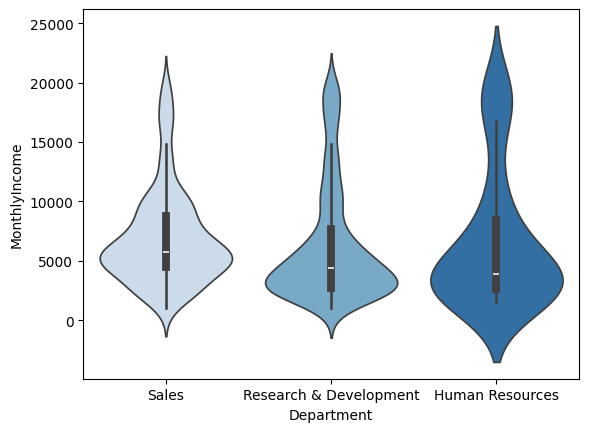

In [213]:
sns.violinplot(data=df1, x="Department", y="MonthlyIncome", palette= 'Blues')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\456655138.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numDep = df2.groupby('Department')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\456655138.py:2: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numDep = df2.groupby('Department')['MonthlyIncome'].agg([ np.median])


Text(0.5, 1.0, 'Median Monthly Income')

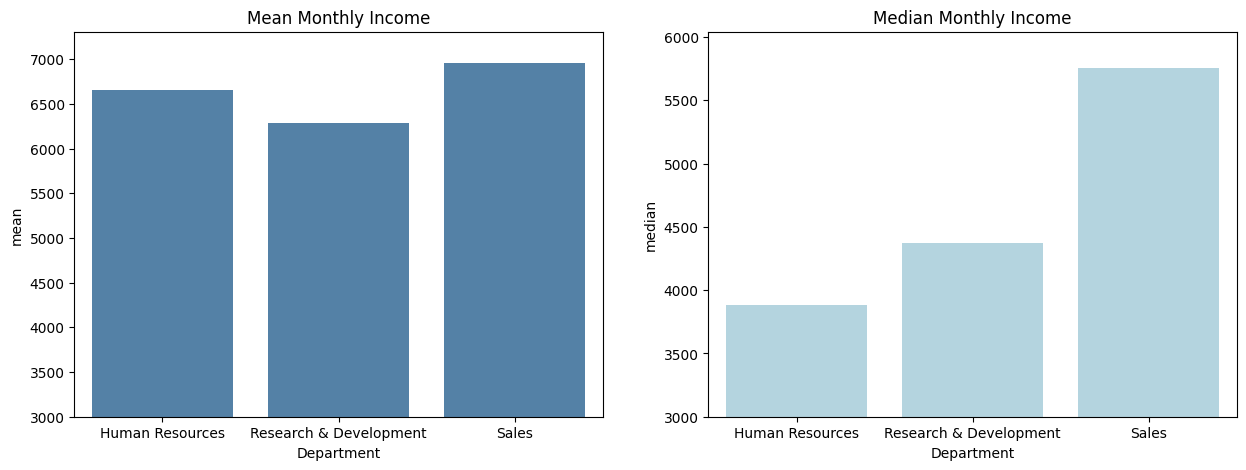

In [214]:
mean_numDep = df2.groupby('Department')['MonthlyIncome'].agg([np.mean])
median_numDep = df2.groupby('Department')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

sns.barplot(x='Department', y='mean', data=mean_numDep, color='steelblue', ax=axes[0])
sns.barplot(x='Department', y='median', data=median_numDep, color='lightblue', ax=axes[1])

axes[0].set_ylim(3000, None)  
axes[0].set_title('Mean Monthly Income')

axes[1].set_ylim(3000, None)  
axes[1].set_title('Median Monthly Income')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1322631239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_numDep = df2.groupby(['Department', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1322631239.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numDep = df2.groupby(['Department', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()


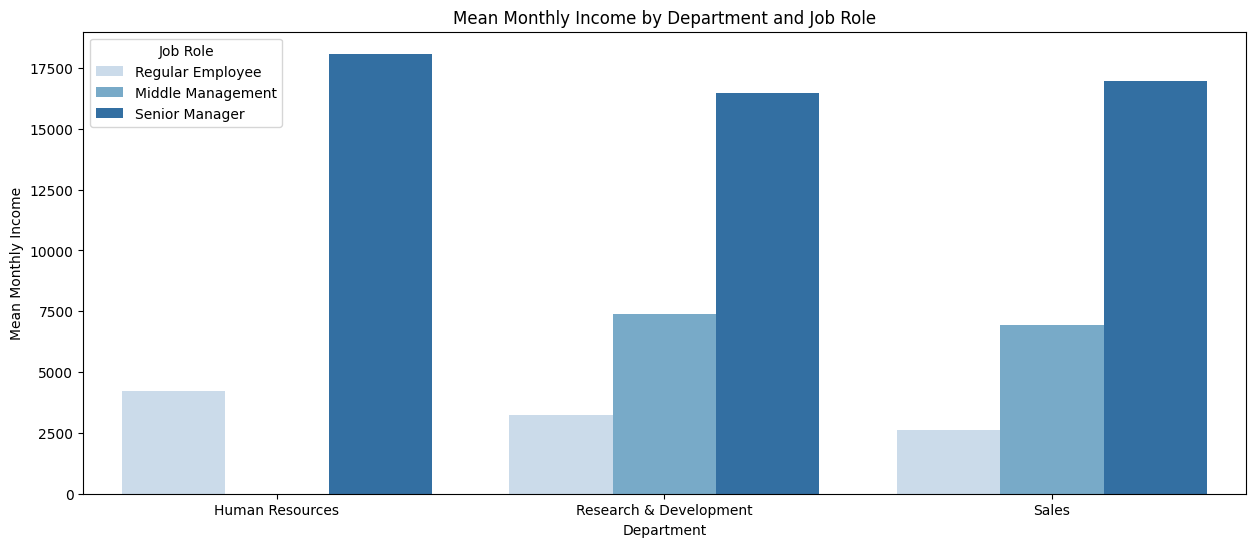

In [215]:
mean_numDep = df2.groupby(['Department', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()

# Crear la figura y los ejes
plt.figure(figsize=(15, 6))

# Crear el barplot con hue para JobRole
sns.barplot(x='Department', y='mean', hue='JobRole', data=mean_numDep, palette='Blues')

# Añadir las etiquetas informativas del eje y el título
plt.xlabel("Department")
plt.ylabel("Mean Monthly Income")
plt.title("Mean Monthly Income by Department and Job Role")
plt.legend(title="Job Role")

# Mostrar el gráfico
plt.show()

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2114779940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="EducationField", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='EducationField', ylabel='MonthlyIncome'>

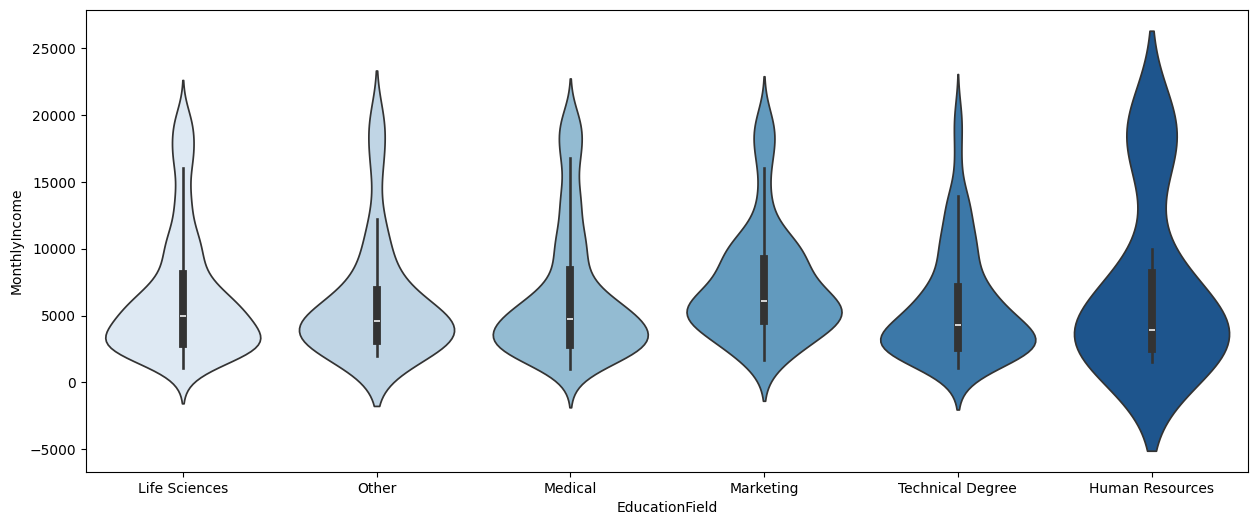

In [216]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df1, x="EducationField", y="MonthlyIncome", palette= 'Blues')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\364545870.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numEF = df2.groupby('EducationField')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\364545870.py:2: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numEF = df2.groupby('EducationField')['MonthlyIncome'].agg([ np.median])


Text(0.5, 1.0, 'Median Monthly Income')

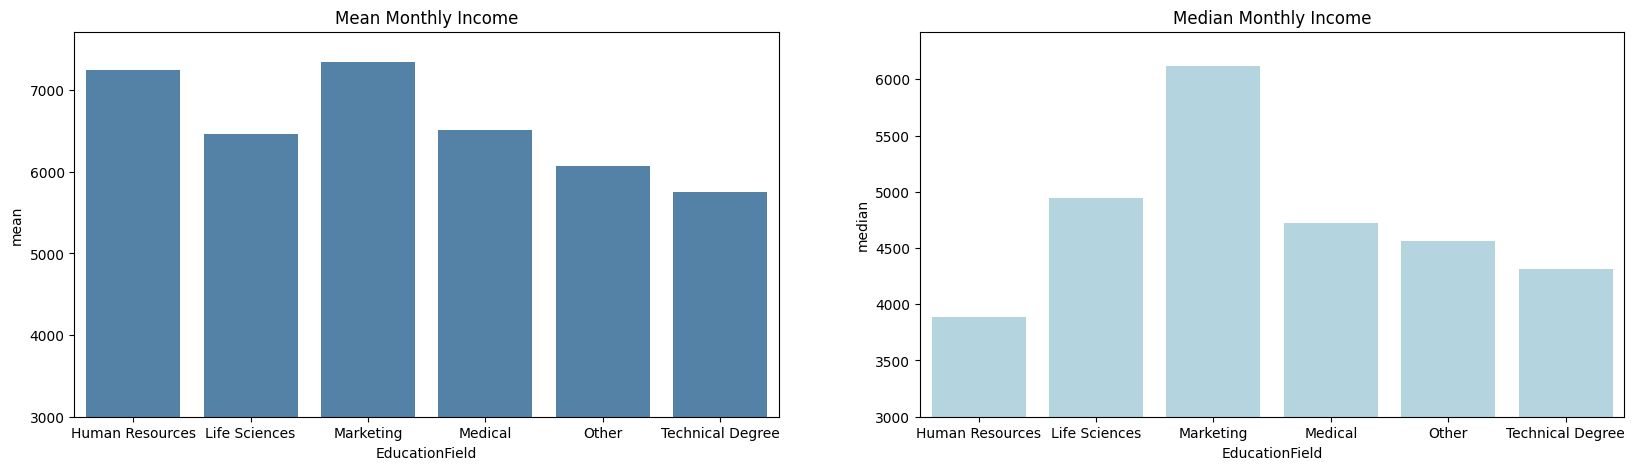

In [217]:
mean_numEF = df2.groupby('EducationField')['MonthlyIncome'].agg([np.mean])
median_numEF = df2.groupby('EducationField')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(20,5), sharex=True)

sns.barplot(x='EducationField', y='mean', data=mean_numEF, color='steelblue', ax=axes[0])
sns.barplot(x='EducationField', y='median', data=median_numEF, color='lightblue', ax=axes[1])

axes[0].set_ylim(3000, None)  
axes[0].set_title('Mean Monthly Income')

axes[1].set_ylim(3000, None)  
axes[1].set_title('Median Monthly Income')

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3196289988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_numEF = df2.groupby(['EducationField', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3196289988.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numEF = df2.groupby(['EducationField', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()


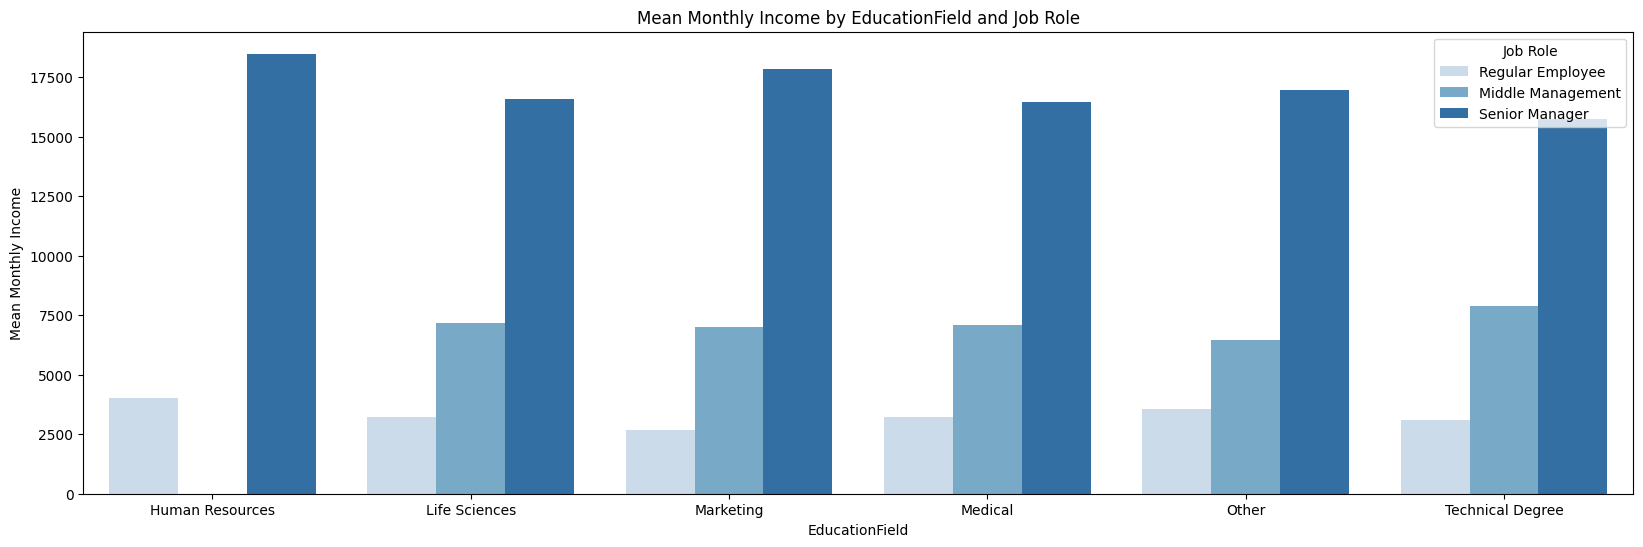

In [218]:
mean_numEF = df2.groupby(['EducationField', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()

# Crear la figura y los ejes
plt.figure(figsize=(20, 6))

# Crear el barplot con hue para JobRole
sns.barplot(x='EducationField', y='mean', hue='JobRole', data=mean_numEF, palette='Blues')

# Añadir las etiquetas informativas del eje y el título
plt.xlabel("EducationField")
plt.ylabel("Mean Monthly Income")
plt.title("Mean Monthly Income by EducationField and Job Role")
plt.legend(title="Job Role")

# Mostrar el gráfico
plt.show()

- **Hipótesis 3**:"La vida personal puede tener un impacto en el salario- El grado de satisfacción dentro de una relación sentimental, el estado matrimonial y la precepción del equilibrio entre la vida personal y laboral pueden tener influye en el salario mensual"

In [222]:
df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2853107831.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\2853107831.py:1: FutureWarning: The provided callable <function median at 0x0000025C4ED67F60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
RelationshipSatisfaction,,
1,6177.793478,4745.0
2,6596.983498,4950.0
3,6543.773420,4907.0
4,6601.296296,5027.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3518603490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_numRS = df2.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3518603490.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numRS = df2.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3518603490.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

Text(0.5, 1.0, 'Median Monthly Income')

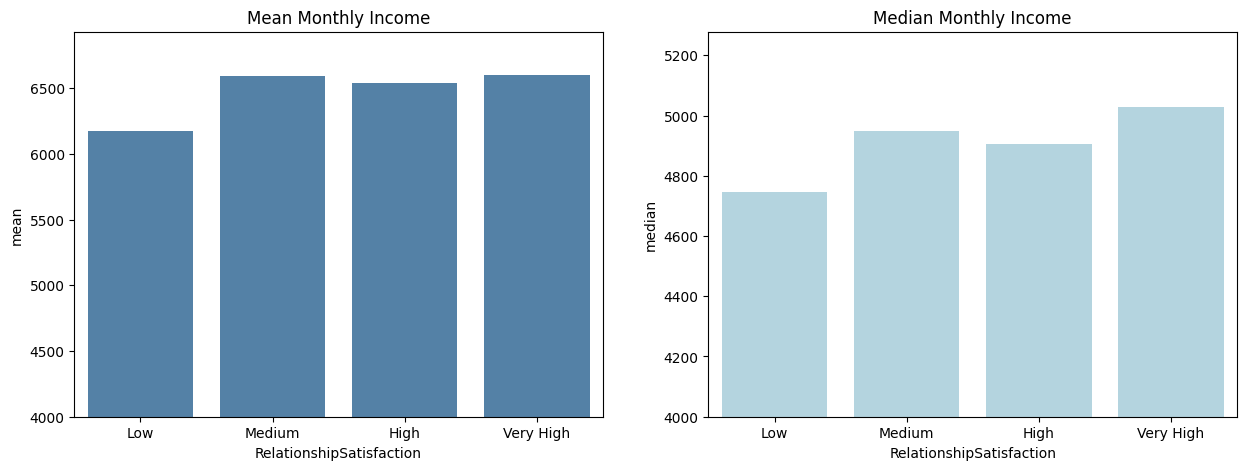

In [225]:
mean_numRS = df2.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean])
median_numRS = df2.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

df2['RelationshipSatisfaction'] = pd.Categorical(df2['RelationshipSatisfaction'], categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)

sns.barplot(x='RelationshipSatisfaction', y='mean', data=mean_numRS, color='steelblue', ax=axes[0])
sns.barplot(x='RelationshipSatisfaction', y='median', data=median_numRS, color='lightblue', ax=axes[1])

axes[0].set_ylim(4000, None)  
axes[0].set_title('Mean Monthly Income')

axes[1].set_ylim(4000, None)  
axes[1].set_title('Median Monthly Income')

In [ ]:
df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\1739773876.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_data12 = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean])


Text(0.5, 1.0, 'Mean Monthly Income by WorkLifeBalance')

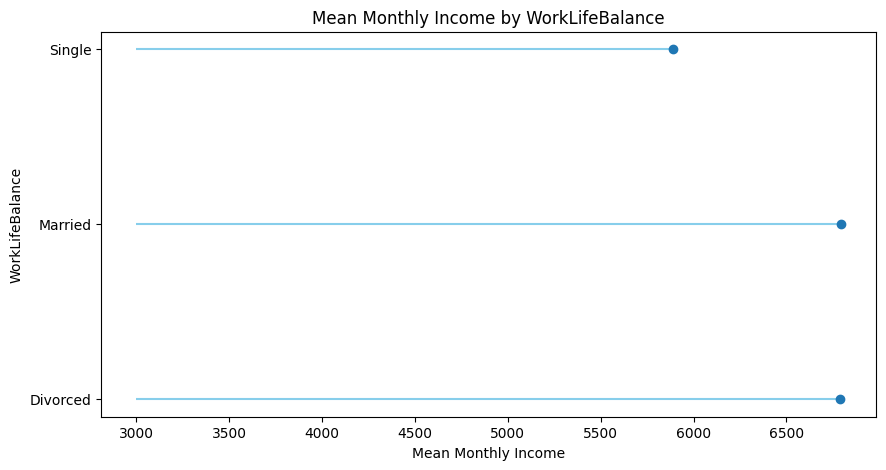

In [227]:
agg_data12 = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean])

# Crear la figura y los ejes
plt.figure(figsize=(10, 5))

# Crear un gráfico de líneas horizontales
plt.hlines(y=agg_data12.index, xmin=3000, xmax=agg_data12['mean'], color='skyblue')
plt.plot(agg_data12['mean'], agg_data12.index, "o")

# Añadir etiquetas y título
plt.xlabel('Mean Monthly Income')
plt.ylabel('WorkLifeBalance')
plt.title('Mean Monthly Income by WorkLifeBalance')

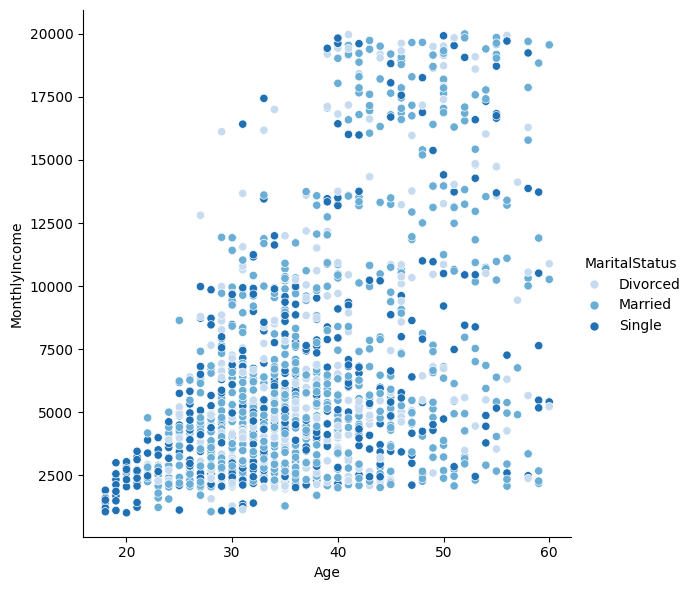

In [242]:
df2['MaritalStatus'] = pd.Categorical(df2['MaritalStatus'], categories=['Divorced', 'Married', 'Single'], ordered=True)


sns.relplot(data=df2,
            x="Age",
            y="MonthlyIncome",
            hue="MaritalStatus",
            sizes=(4, 300),
            alpha=1, palette='Blues',
            height=6);

In [246]:
df1.groupby('MaritalStatus')['Age'].mean()

MaritalStatus
Divorced    37.489297
Married     37.757801
Single      35.336170
Name: Age, dtype: float64

C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3230539789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_numMS = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3230539789.py:1: FutureWarning: The provided callable <function mean at 0x0000025C4EC516C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numMS = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_41400\3230539789.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior

Text(0.5, 1.0, 'Median Age')

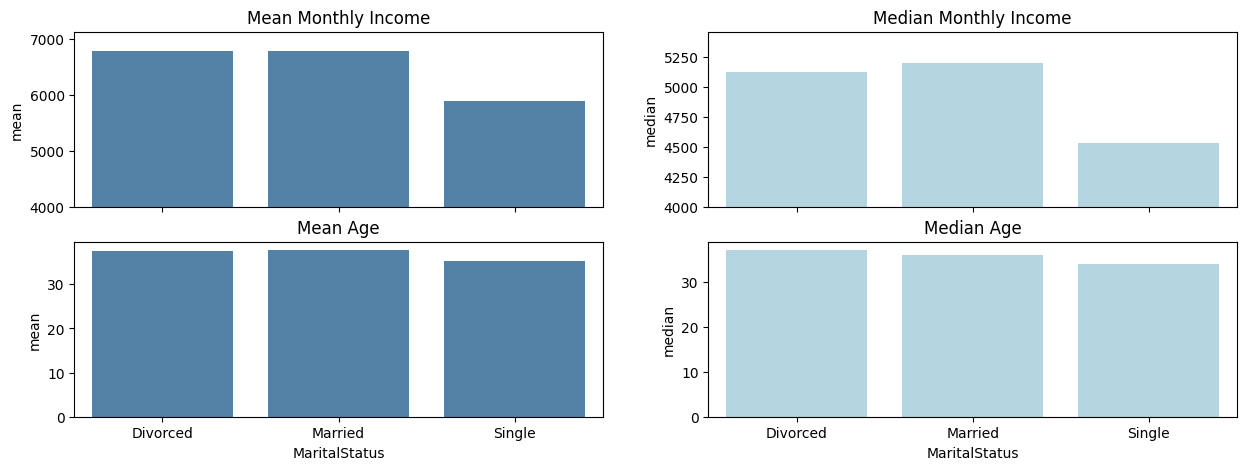

In [251]:
mean_numMS = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean])
median_numMS = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(2, 2, figsize=(15,5), sharex=True)

df2['MaritalStatus'] = pd.Categorical(df2['MaritalStatus'], categories=['Divorced', 'Married', 'Single'], ordered=True)

sns.barplot(x='MaritalStatus', y='mean', data=mean_numMS, color='steelblue', ax=axes[0,0])
sns.barplot(x='MaritalStatus', y='median', data=median_numMS, color='lightblue', ax=axes[0,1])

axes[0,0].set_ylim(4000, None)  
axes[0,0].set_title('Mean Monthly Income')

axes[0,1].set_ylim(4000, None)  
axes[0,1].set_title('Median Monthly Income')


mean_numMSA = df2.groupby('MaritalStatus')['Age'].agg([np.mean])
median_numMSA = df2.groupby('MaritalStatus')['Age'].agg([ np.median])


sns.barplot(x='MaritalStatus', y='mean', data=mean_numMSA, color='steelblue', ax=axes[1,0])
sns.barplot(x='MaritalStatus', y='median', data=median_numMSA, color='lightblue', ax=axes[1,1])

axes[1,0].set_ylim(None, None)  
axes[1,0].set_title('Mean Age')

axes[1,1].set_ylim(None, None)  
axes[1,1].set_title('Median Age')

### BONUS: RELACIONES ENTRE VARIABLES

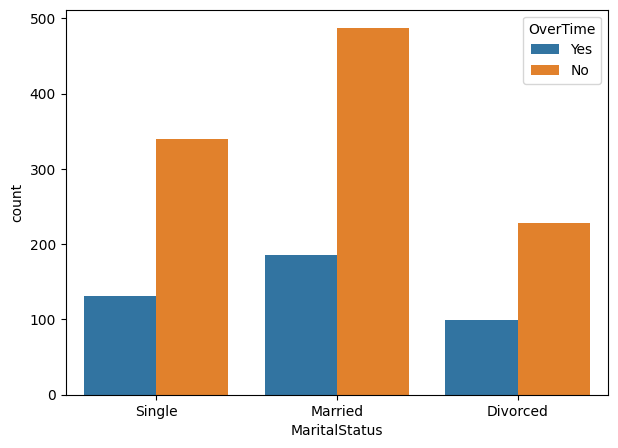

In [219]:
plt.figure(figsize=(7,5))
sns.countplot(x=df1["MaritalStatus"], hue=df1["OverTime"]);

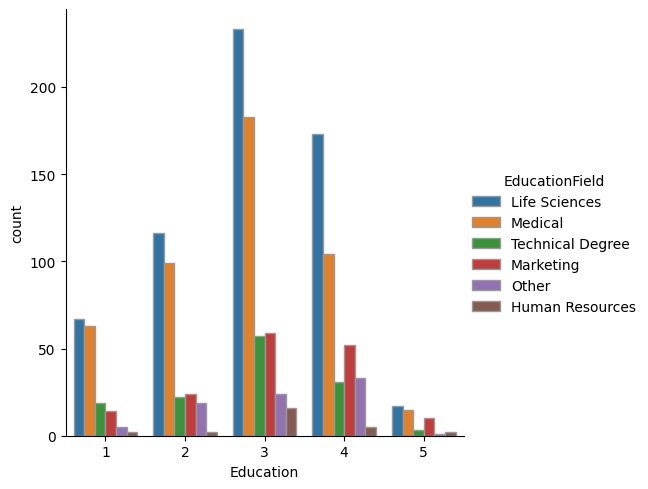

In [220]:
sns.catplot(x="Education",
            hue="EducationField",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1);

In [221]:
sns.catplot(x="Education",
            hue="Attrition",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1);

ValueError: Could not interpret value `Attrition` for `hue`. An entry with this name does not appear in `data`.

<Figure size 2000x500 with 0 Axes>

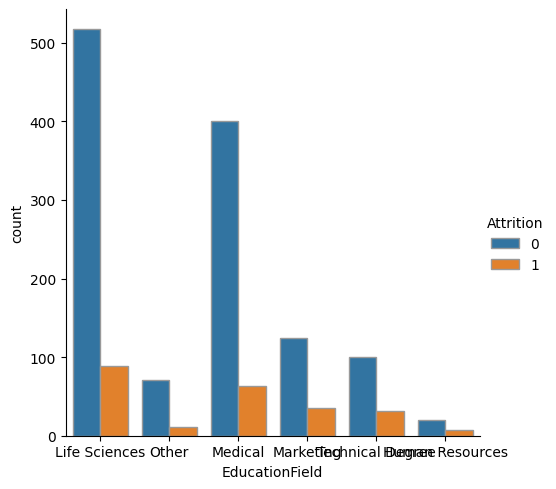

In [ ]:
plt.figure(figsize=(20,5))
sns.catplot(x="EducationField",
            hue="Attrition",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1)